<h1>Fitting a spectral background template</h1>
<h3>Typically, I would start with "how to fit a line", but since you know that, I start with "what actually is a likelihood?":<br><br>
    A likelihood $\mathscr{L}(D|M)$ ('$D$ given $M$') describes the probability of measuring data $D$ when your expectation (model) is $M$.<br>
    So, in case of our photon counting experiment, we ask: "how likely is it to measure $d$ counts (per time, per energy bin, per angle bin, per whatever) when my model suggests $m$ counts?". Now, if we keep it at "per time" to make things easier to understand, we measure $d$ counts in time interval $\Delta t$ and want to know what is the rate $\lambda$ of our $\gamma$-ray emitting source, such that $m = \lambda \Delta t$.<br>
    Photon (any) counting experiments follows the Poisson distribution:<br><br>
    $P(d|m) = \frac{m^d e^{-m}}{d!}$<br><br>
    Example: Suppose you measure for $1\,\mathrm{hr}$ in your lab and detect $d=0$ photons from your source. What is the observed rate $\lambda$ (assuming $\lambda$ is constant in time)?<br>
    You might think, it's obviously zero; of course, I chose this example to make clear, why this is not (necessarily) the case, and why $\chi^2$, for example, breaks down, because it's analytically solvable, and because COSI most of the time measures zero in its binned data space.<br>
    First, how do we find $m$ (or $\lambda$)? This is equivalent to asking, what value of $m$ maximises the probability $P(d=0|m)$: this is the maximum likelihood method. So the take the derivative of $P$ wrt $m$:<br><br>
    $\frac{\partial}{\partial m}P(d=0|m) = 0$<br>
    $\frac{\partial}{\partial m}e^{-m} = 0$<br>
    $-e^{-m} = 0$<br>
    $m=+\infty$<br>
    ????<br><br>
    Clearly, infinity is not the answer. In fact, what is the answer is already provided in $P(d=0|m) = e^{-m}$. This is a normalised probability density function, when you consider that $m$ must be positive definite. That means we have to take into account that the boundary of this distribution $m=0$ is to be considered as well.<br>
    Now comes the confusing between probability and likelihood: if we insert $m$ in our probability density function, $P(d=0|m=0)$, we get $1.0$. This is the trivial result: if we don't measure, we don't get counts. But it is also a very important result: if we assume $m=0$ we <em>never</em> see any counts. So if $m=0$, $d$ <em>must</em> be zero as well.<br><br>
    I emphasise this apparently dumb example because in the beginning, I wrote "suppose you measured for one hour in your lab and got zero counts from your source", which dosen't prevent the true rate of your source to <em>always</em> take the value zero. It is just the most likely value in this time interval.<br>
    If you ever had a stats class when they talk about a proabaility density function, you know that any point on this curve is a point in which you have zero confidence in. The (only) meaningful values to extract from a probability density function are expectation values, standard deviations, or otherwise defined intervals. Going back to the example we had $P(m) = e^{-m}$, so that:<br>
    Expectation value: $\langle m \rangle = \int_0^{\infty} m P(m) dm = \left[ -e^{-m}(m+1) \right]_0^{\infty} = 1.0$.<br>
    Standard deviation: $\sigma_m^2 = \int_0^{\infty} (m - \langle m \rangle)^2 P(m) dm = \left[ -e^{-m}(m^2+1) \right]_0^{\infty} = 1.0$.<br><br>
    Now we have measured $d = 0$ and our resulting rate is $\langle m \rangle \pm \sigma_m = 1 \pm 1$ (per hour). This appears reasonable, as 'within $1\sigma$', the model rate is zero (which would mean, instead of a radioactive source, you forgot to remove the lid or something). Though, in particular, this is also a nice example to calculate an 'upper limit', i.e. "how many photons could we hide in the noise as otherwise our detector would have seen it?".<br><br>
    Yeah, wtf am I talking about, we measured zero and there is no noise. In fact, as I hope you saw, there are no error bars either. Data don't have errors - models and their parameters do. We either meausre 3 photons or not: if I give you three snakes, you wouldn't say within $2\sigma$ you have no snakes. That's simply not true. You have three snakes, that I gave you at an unknown rate!<br>
    Back to the upper limit: this word is often mis-used because it is not clearly defined in most cases, i.e. which confidence interval are we actually looking at. Here, I pick, in remembrance to the normal distribution, an interval that contains 99.85% (one minus one-sided tail distribution or survival probability) from the rate $m=0$, i.e. I calculate<br><br>
    $P(d=0 | 0 \leq m \leq m_{UL}) = 0.9985$ which of course is equivalent to<br>
    $0.0015 = P(d=0 | m > m_{UL})$, whatever is easier to calculate.<br>
    $0.9985 = 1 - e^{-m_{UL}}$<br>
    $m_{UL} = -\ln 0.0015 \approx 6.5$<br><br>
This means our '$3\sigma$ upper limit on the rate' is $6.5$. Even with a rate of $m=6.5$ (per hour), we can expect to measure a lot of zeros during any 1 hour interval.<br><br>
What does that have to do with all your background? We'll come to that later. First, we introduce a second measurement and walk through the same likelihood considerations. Suppose in the second hour of measurement, you measured $d_2 = 3$, so that you have a data set $D = \{d_1, d_2\} = \{0 , 3\}$. What is the rate?<br><br>
Most important information here is that these measurements are independent or each other, i.e. it doesn't matter that you first measured 0 and then 3 or had a day gap in between. That means the likelihood function is just the product of the two probabilities (or in general as many data points $N$ as you have):<br><br>
$\mathscr{L}(D|M) = \prod_{i=1}^{N} \frac{m_i^{d_i} e^{-m_i}}{d_i!}$ and thus in our case<br>
$\mathscr{L}(D|M) = P(d=0|m) \cdot P(d=3|m) = e^{-m} \cdot \frac{m^3 e^{-m}}{3!} = \frac{1}{6} m^3 e^{-2m}$<br><br>
This basically already is the answer - except that this is not a proper probability any more. Each probability density function itself integrated from $0$ to $\infty$ is 1, i.e. $\int_0^{\infty} dm P(d=0|m) = 1$ and $\int_0^{\infty} dm P(d=3|m) = 1$. However, the joint probability is not $\int_0^{\infty} dm P(d=0|m)P(d=3|m) = \frac{1}{16} := \mathscr{P}$. The value $\mathscr{P}$ defines a normalisation constant that we can calculate in this case still analytically, i.e. the full PDF is $P(D|m) = \frac{16}{6} m^3 e^{-2m}$.<br>
You can now calculate the expectation value, and the standard deviation around that value:<br>
    $\langle m \rangle = 2.0$<br>
    $\sigma_m = 1.0$<br><br>
    Now we have $\langle m \rangle \pm \sigma_m = 2 \pm 1$. I believe, this is not what you expected (more like $1.5$ I guess?), but this is the expectation value, not the maximum likelihood! Let's find that:<br><br>
    $\frac{\partial}{\partial m}\frac{1}{6} m^3 e^{-2m} = 0$<br>
    $\frac{1}{6}(-2e^{-2m}m^3 + e^{-2m}3m^2) = 0$<br>
    $m_{ML} = 1.5$<br><br>
Yes, small number statistics is weird, which is why I detail that out here. (BTW, what would $\chi^2$ say, and how do you do that when $d=0$?)<br>
Suppose we want to calculate a symmetric confidence interval around that maximum likelihood value (rather than around the expectation value) for some reason (the reason is, that is typically done, or approximated). That means we calculate:<br><br>
    $\int_{m_{ML}-\sigma_{m_{ML}}}^{m_{ML}+\sigma_{m_{ML}}} dm \frac{16}{6} m^3 e^{-2m} = 0.683$<br>
    Yeah, now it get's messy, which is why this is typically approximated. So, let's first calculate this exactly, and then use the approximation and see how good that is.<br>
    The integral can still be solved, but the equation for $\sigma_{m_{ML}}$ is not. There will be three solutions for $\sigma_{m_{ML}}$, but only one is reasonble, namely $\sigma_{m_{ML}} \approx 0.92$.<br>
    So, 'the solution' would be $m_{ML} \pm \sigma_{m_{ML}} = 1.5 \pm 0.92$. This interval is different and smaller (!) than what we had before when we calculated the expectation value and the standard deviation. Which solution is now correct? Both. Both intervals contain $\approx 70\%$ of the probability density function, just that we picked different pivot points of this asymmetric PDF.<br>
    Now, what do I mean by approximation? Typically when one ends up with an asymmetric likelihood function, its logarithm is approximated by a parabola (i.e. we actually use the normal distribution instead of the true asymmetric one), i.e. a Taylor expansion around the maximum log-likelihood:<br><br>
    $\ln\left[ \frac{16}{6} m^3 e^{-2m} \right]$ around $m_{ML} = 1.5$ is $\ln P(D|m) \approx -0.80 - 0.67(m-1.5)^2$ to second order.<br>
    The log-likelihood value of the normal distribution at $\pm 1\sigma$ is $\ln \mathscr{N}(\langle m \rangle \pm \sigma_m,\sigma_m) = \ln\left[ \frac{1}{\sqrt{2\pi}\sigma_m}\exp\left(-\frac{1}{2}\left(\frac{(\langle m \rangle \pm \sigma_m) - \langle m \rangle}{\sigma_m}\right)^2\right) \right] = \ln \left[ \frac{1}{\sqrt{2\pi}\sigma_m} e^{-1/2} \right] = - \frac{1}{2} - \ln\left[ \sqrt{2\pi}\sigma_m \right]$, which is exactly $\Delta \mathscr{N} = 0.5$ from the maximum likelihood value $\ln \mathscr{N}(\langle m \rangle,\sigma_m) = - \ln\left[ \sqrt{2\pi}\sigma_m \right]$.<br>
    This means we need to find the values of $m$ where $\ln P(D|m) \approx -0.80 - 0.67(m-1.5)^2$ is reduced by $0.5$, i.e.<br>
    $\ln P(D|m) \approx -0.80 - 0.67(m-1.5)^2 = -0.80-0.5$<br>
    The quadratic equation (this is why this is used) then gives $m_{ML} - \sigma_m = 0.64$ and $m_{ML} + \sigma_m = 2.36$, so that $\sigma_m \approx 0.86$. This approximation thus provides a smaller(!) confidence interval, because we ignore that the distribution is actually asymmetric. So, if you can, you should always use the full distribution to calculate uncertainties.<br><br>
    If the distribution is asymmetric, why didn't we get asymmetric uncertainties? Because we didn't search for them. One could of course always ask the question, how far away from a certain point (ML solution, or expectation value, or median value, or mode value, or ...) do one has to go in one direction to cover the same probability mass in both directions? That would ask two separate integrals:<br><br>
    $\int_{\langle m \rangle - \sigma_m^-}^{{\langle m \rangle}} dm P(D|m) = 0.683/2$ and<br>
    $\int_{\langle m \rangle}^{{\langle m \rangle} + \sigma_m^+} dm P(D|m) = 0.683/2$,<br>
    which are then solved independently for the upper and lower uncertainty $\sigma_m^+$ and $\sigma_m^-$, respectively.<br>
    Inserting the values, I get in this example $\sigma_m^+ = 1.4$ and $\sigma_m^- = 0.8$, so that my (preferred) interval and solution to quote would be $\langle m \rangle ^{+\sigma_m^+}_{-\sigma_m^-} = 2.0^{+1.4}_{-0.8}$. This includes the shape of the distribution and again the '$1\sigma$'-interval of 68.3%. Note how arbitrary the intervals are chosen (it's taken from the normal distribution, even though the probability can be anything, like 90%, 95%, 99%, 99.99999%, 12%, 42%).<br><br>
    Now all that preliminary skirmish was necessary to understand what will happen when we cannot calculate these integrals by hand any more and use an integration technique called Monte Carlo sampling.<br>
    I will now plot the examples I used so far, and then define the next step: two parameters.</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thomas')

In [2]:
plt.style.use('thomas')

In [3]:
# data
d1 = 0.
d2 = 3.

# model value array
m = np.linspace(0,10,1000)
# for numerical integration in steps
dm = np.diff(m)[0]

# Poisson distribution (there are scipy function for this)
def Poisson(d,m):
    return m**d*np.exp(-m)/np.math.factorial(d)

# PDFs
P1 = Poisson(d1,m)
P2 = Poisson(d2,m)

# integrating PDFs to for consistency
P1_norm = np.sum(P1*dm)
P2_norm = np.sum(P2*dm)
print('Area under curve P1: {0:.3f}'.format(P1_norm))
print('Area under curve P2: {0:.3f}'.format(P2_norm))

# why not both?
P12_norm = np.sum(P1*P2*dm)
print('Area under curve P12 (wrong): {0:.3f}'.format(P12_norm))
P12 = P1*P2/P12_norm
print('Area under curve P12 (normalised): {0:.3f}'.format(np.sum(P12*dm)))

Area under curve P1: 1.005
Area under curve P2: 0.990
Area under curve P12 (wrong): 0.062
Area under curve P12 (normalised): 1.000


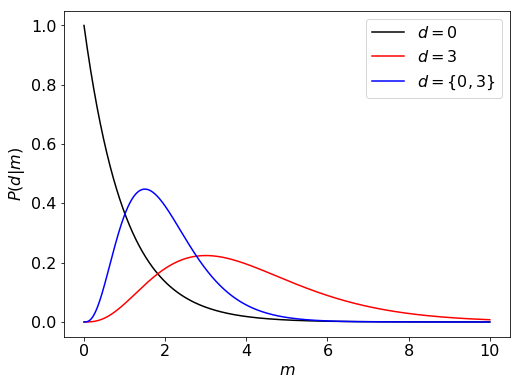

In [4]:
plt.plot(m,P1,label=r'$d=0$')
plt.plot(m,P2,label=r'$d=3$')
plt.plot(m,P12,label=r'$d=\{0,3\}$')
plt.xlabel(r'$m$')
plt.ylabel(r'$P(d|m)$')
plt.legend()

In [5]:
# case 1: d1 = 0
m_mean = np.sum(P1*m*dm)
m_std = np.sqrt(np.sum(P1*(m-m_mean)**2*dm))

print('m = {0:.3f} +/- {1:.3f}'.format(m_mean,m_std))

# upper limit
p_ul3 = 0.9985
m_ul3 = -np.log(1-p_ul3)

print('"3sigma" upper limit: m < {0:.3f}'.format(m_ul3))

m = 0.999 +/- 1.000
"3sigma" upper limit: m < 6.502


In [6]:
# case 2: d1 = 0, d2 = 3
m_mean = np.sum(P12*m*dm)
m_std = np.sqrt(np.sum(P12*(m-m_mean)**2*dm))

print('m = {0:.3f} +/- {1:.3f}'.format(m_mean,m_std))

m = 2.000 +/- 1.000


In [7]:
# how to solve the integral equation with python:

In [8]:
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.optimize import minimize

In [9]:
def integrand(x):
    return Poisson(0,x)*Poisson(3,x)/P12_norm

def func_ub(b):
    integral,err = quad(integrand, m_mean, m_mean+b)
    return integral - 0.683/2

def func_lb(b):
    integral,err = quad(integrand, m_mean+b, m_mean)
    return integral - 0.683/2

vfunc_ub = np.vectorize(func_ub)
vfunc_lb = np.vectorize(func_lb)

In [10]:
sigma_m_ub = fsolve(vfunc_ub, 0)[0]
sigma_m_lb = fsolve(vfunc_lb, 0)[0]

print('upper bound, sigma+: {0:.3f}'.format(sigma_m_ub))
print('lower bound, sigma-: {0:.3f}'.format(sigma_m_lb))

upper bound, sigma+: 1.407
lower bound, sigma-: -0.791


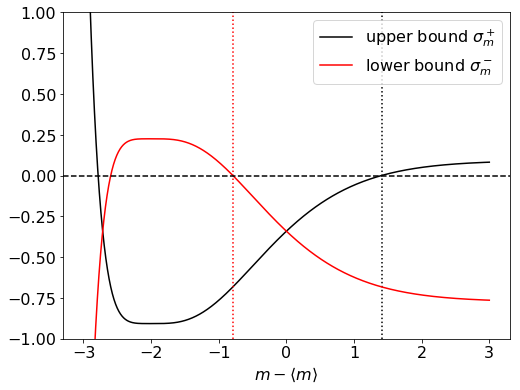

In [11]:
b_arr = np.linspace(-3.,3.,1000)

plt.plot(b_arr,vfunc_ub(b_arr),label='upper bound $\sigma_m^+$',color='black')
plt.axvline(sigma_m_ub,color='black',linestyle=':')
plt.plot(b_arr,vfunc_lb(b_arr),label='lower bound $\sigma_m^-$',color='red')
plt.axvline(sigma_m_lb,color='red',linestyle=':')
plt.axhline(0,linestyle='--')
plt.xlabel(r'$m-\langle m \rangle$')
plt.ylim(-1,1)
plt.legend()

In [12]:
# "2sigma errors"

def func_ub2(b):
    integral,err = quad(integrand, m_mean, m_mean+b)
    return integral - 0.954/2

def func_lb2(b):
    integral,err = quad(integrand, m_mean+b, m_mean)
    return integral - 0.954/2

vfunc_ub2 = np.vectorize(func_ub2)
vfunc_lb2 = np.vectorize(func_lb2)

In [13]:
sigma_m_ub2 = fsolve(vfunc_ub2, 0.5)[0]
sigma_m_lb2 = fsolve(vfunc_lb2, 0)[0]

print('upper bound, 2sigma+: {0:.3f}'.format(sigma_m_ub2))
print('lower bound, 2sigma-: {0:.3f}'.format(sigma_m_lb2))

upper bound, 2sigma+: 20.556
lower bound, 2sigma-: -1.162


/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


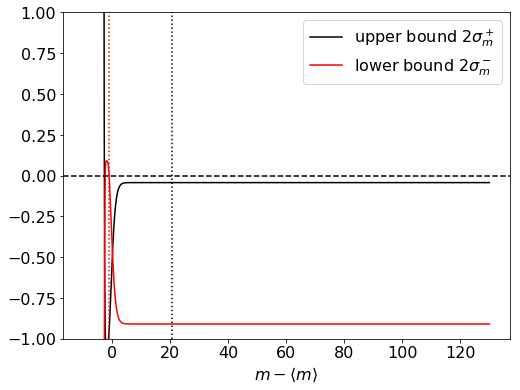

In [14]:
b_arr = np.linspace(-10.,130.,1000)

plt.plot(b_arr,vfunc_ub2(b_arr),label='upper bound $2\sigma_m^+$',color='black')
plt.axvline(sigma_m_ub2,color='black',linestyle=':')
plt.plot(b_arr,vfunc_lb2(b_arr),label='lower bound $2\sigma_m^-$',color='red')
plt.axvline(sigma_m_lb2,color='red',linestyle=':')
plt.axhline(0,linestyle='--')
plt.xlabel(r'$m-\langle m \rangle$')
plt.ylim(-1,1)
plt.legend()

<h3>There is no "$2\sigma$" upper bound for $\langle m \rangle$ because the mean is not the median!</h3>

In [15]:
# finding the median of a PDF:

def func_med(m_med):
    integral,err = quad(integrand, m_med, np.inf)
    return integral - 0.5

vfunc_med = np.vectorize(func_med)

In [16]:
m_med = fsolve(vfunc_med, 1)[0]

print('median value: {0:.3f}'.format(m_med))

median value: 1.836


In [17]:
# 1 and 2 sigma around median

def func_ub1_med(b):
    integral,err = quad(integrand, m_med, m_med+b)
    return integral - 0.683/2

def func_ub2_med(b):
    integral,err = quad(integrand, m_med, m_med+b)
    return integral - 0.954/2

def func_lb1_med(b):
    integral,err = quad(integrand, m_med+b, m_med)
    return integral - 0.683/2

def func_lb2_med(b):
    integral,err = quad(integrand, m_med+b, m_med)
    return integral - 0.954/2

vfunc_ub1_med = np.vectorize(func_ub1_med)
vfunc_lb1_med = np.vectorize(func_lb1_med)
vfunc_ub2_med = np.vectorize(func_ub2_med)
vfunc_lb2_med = np.vectorize(func_lb2_med)

In [18]:
sigma_m_med_ub1 = fsolve(vfunc_ub1_med, 0)[0]
sigma_m_med_lb1 = fsolve(vfunc_lb1_med, 0)[0]
sigma_m_med_ub2 = fsolve(vfunc_ub2_med, 0)[0]
sigma_m_med_lb2 = fsolve(vfunc_lb2_med, 0)[0]

print('upper bound, 1sigma+: {0:.3f}'.format(sigma_m_med_ub1))
print('lower bound, 1sigma-: {0:.3f}'.format(sigma_m_med_lb1))
print('upper bound, 2sigma+: {0:.3f}'.format(sigma_m_med_ub2))
print('lower bound, 2sigma-: {0:.3f}'.format(sigma_m_med_lb2))

upper bound, 1sigma+: 1.124
lower bound, 1sigma-: -0.794
upper bound, 2sigma+: 2.607
lower bound, 2sigma-: -1.305


In [19]:
# ML solution

def cstat(m,d):
    return np.sum(m-d*np.log(m))

nll = lambda *args: cstat(*args)

In [20]:
result_ML = minimize(nll,x0=1,args=([d1,d2]))
result_ML

      fun: 1.7836046756767354
 hess_inv: array([[0.75370516]])
      jac: array([-1.8030405e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.49999864])

In [21]:
m_ML = result_ML.x[0]
sigma_ML = np.sqrt(result_ML.hess_inv)[0][0]

print('Maximum likelihood solution: {0:.3f} +/- {1:.3f}'.format(m_ML,sigma_ML))

Maximum likelihood solution: 1.500 +/- 0.868


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


(0, 10.5)

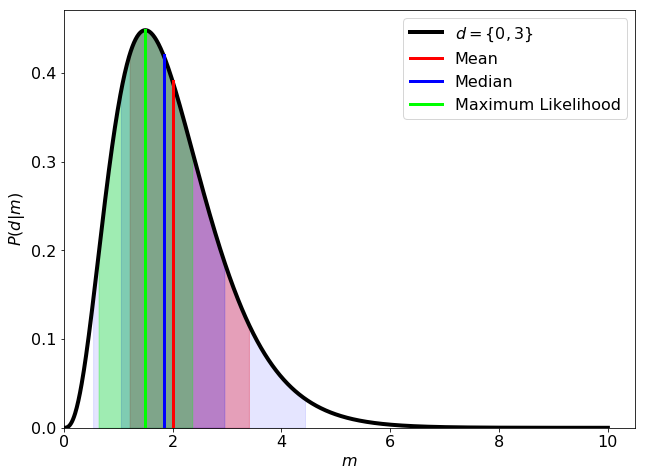

In [22]:
# plotting the distribution and intervals:
plt.figure(figsize=(10.24,7.68))

# PDF
plt.plot(m,P12,label=r'$d=\{0,3\}$',linewidth=4)

# mean value
mdx_mean = np.where(np.abs(m - m_mean) < 0.005)[0]
plt.plot(np.repeat(m_mean,2),[0,P12[mdx_mean]],color='red',label='Mean',linewidth=3)

# asymmetric 1 sigma range around mean
mdx_1s = np.where((m >= m_mean+sigma_m_lb) & (m <= m_mean+sigma_m_ub))[0]
plt.fill_between(m[mdx_1s],P12[mdx_1s],np.zeros(len(mdx_1s)),color='red',alpha=0.3)

# median value
mdx_med = np.where(np.abs(m - m_med) < 0.005)[0]
plt.plot(np.repeat(m_med,2),[0,P12[mdx_med]],color='blue',label='Median',linewidth=3)

# asymmetric 1 and 2 sigma bands around median
mdx_med_1s = np.where((m >= m_med+sigma_m_med_lb1) & (m <= m_med+sigma_m_med_ub1))[0]
plt.fill_between(m[mdx_med_1s],P12[mdx_med_1s],np.zeros(len(mdx_med_1s)),color='blue',alpha=0.2)
mdx_med_2s = np.where((m >= m_med+sigma_m_med_lb2) & (m <= m_med+sigma_m_med_ub2))[0]
plt.fill_between(m[mdx_med_2s],P12[mdx_med_2s],np.zeros(len(mdx_med_2s)),color='blue',alpha=0.1)

# maximum likelihood value
mdx_ML = np.where(np.abs(m - m_ML) < 0.005)[0]
plt.plot(np.repeat(m_ML,2),[0,P12[mdx_ML]],color='lime',label='Maximum Likelihood',linewidth=3)

# symmetric 1 sigma around ML
mdx_ML_1s = np.where((m >= m_ML-sigma_ML) & (m <= m_ML+sigma_ML))[0]
plt.fill_between(m[mdx_ML_1s],P12[mdx_ML_1s],np.zeros(len(mdx_ML_1s)),color='lime',alpha=0.3)

plt.xlabel(r'$m$')
plt.ylabel(r'$P(d|m)$')
plt.legend()
plt.ylim(0,)
plt.xlim(0,)

<h3>Note how "$\sigma$" is defined differently in all cases:<br>
    <ul>
        <li>Mean: 'first momemt'; variance: 'second moment' of the distribution</li>
        <li>Median: '50th percentile'; $1\sigma$-band: '15.85th-84.15th percentile'</li>
        <li>Maximum likelihood: 'highest point in distribution'; uncertainty: 'from quadratic approximation'</li>
    </ul>
    For the ML case, of course, one can also infer the true asymmetric uncertainties (later).<br><br>
Which value to quote? Doesn't matter as long as you write down which one it is.<br>
Though, clearly, in the case of $0$ counts, the maximum likelihood solution is outside of any(!) confidence interval because it is at the boundary of the solution. This is awkward, but the most common case in COSI.</h3>

<h3>Suppose you have three bins (be it energy, or time, doesn't really matter) in which there is both a contribution from 'background' and from 'sky'.<br>
    We determine the <em>shape</em> of the background, i.e. how much is in each bin wrt to the others, by an off-measurement, and we get $N^{i}_{off}$ counts for bins $i=1,2,3$ for a time $t_{off}$. This might be measuring the background radiation in a lab, or your non-Galactic plane times.<br>
    The on-measurement, e.g. with source or the Galactic plane, measures $N^{i}_{on}$ during a time $t_{on}$.<br>
    The rates in each case are then defined by<br>
    $N^{i}_{off} = R^{i}_{off} \cdot t_{off}$ and<br>
    $N^{i}_{on} = R^{i}_{on} \cdot t_{on}$.<br><br>
    Now, what you did so far is estimating the excess rate of 'the sky' by<br>
    $R_S^i = R_{on}-R_{off} = \frac{N_{on}^i}{t_{on}} - \frac{N_{off}^i}{t_{off}}$, so that the excess counts are<br>
    $N_S^i = R_S \cdot t_{on} = N_{on}^i - \frac{t_{on}}{t_{off}}N_{off}^i = N_{on}^i - \beta^i N_{off}^i =: N_{on}^i - \hat{N}_B^i$.<br><br>
    In your specific case, you used the rate of the continuum bins instead of the exposure times, but the concept is exactly the same: you get a scaling factor $\beta$ that determines how much you have reduce (or increase) the off-measurement for a useful background estimate $\hat{N}_B^i$. With approximate propagation of uncertainties, etc., you then extract $N_S$ for each bin and its uncertainties.<br><br>
    You can see that this has limits:
    <ul>
    <li>If you have only a hand full of counts on your on-measurement, you are subtracting '4.7 photons from 5 photons', which is odd. Of course, if you go back to the domain of the rate, that's more reasonable, but still you deal with 5 photons.</li>
    <li>This treatment ignores the measurement process, i.e. Poisson statistics. While we approximate the uncertainties of all parameters by the square-root scaling, the same problem appears when you consider measuring zero counts. By that definition, 0 has an uncertainty 0, but we saw in the first example, that counts don't have errors, but only the model to describe them does.</li>
    <li>Likewise, estimating the 'significance' with $N_S/\sqrt{\hat{N}_B}$ is in many cases, and again especially for low counts, over-estimating the significance - also again because this doesn't consider the uncertainties.</li>
    </ul>
    <br><br>
    The magic is now only one step: Instead of 'determining' $\beta$, we fit for $\beta$. That is, we rewrite the equation to:<br>
    $N_S^i = N_{on}^i - \beta^i N_{off}^i \Leftrightarrow N_{on}^i = N_S^i + \beta^i N_{off}^i$<br>
    Of course, since we don't know what (or how much) $N_S^i$ is, we fit for its contribution as well:<br><br>
    $N_{on}^i = \alpha^i N_S^i + \beta^i N_{off}^i$<br><br>
    That means, we try to explain the full on measurement by portions of something that we think looks like the sky, and something that we think looks like the background. For simplification, we consider that only one bin, the central one, can have a contribution from the sky (i.e. $N_S^1 = N_S^3 = 0$, and $N_S^2 = 1.$) - but that might not be true in general. And further we assume that the shapes of background and sky do not change, i.e. $\alpha^i = \alpha$ and $\beta^i = \beta$:<br><br>
    $N_{on}^i = \alpha N_S^i + \beta N_{off}^i$<br><br>
    If we can only take an off-measurement for so-and-so long time, we would need to add one step in what comes next. But suppose we have a magic tool, call it simulation, that defines us the shape (not the amplitude(!)) of $N_{off}^i$ very precisely, so that we might call it $N_B^i$. Of course, the better $N_{off}^i$ is measured, i.e. the more counts are included in each bin, the smaller this additional uncertainty term which I just omit now (I will send you the paper):<br><br>
    $N_{on}^i = \alpha N_S^i + \beta N_B^i := m_i(\alpha,\beta)$<br><br>
    Clearly, the on-measurement now is our data set $D = \{ d_1, d_2, d_3\} = \{ N_{on}^1, N_{on}^2, N_{on}^3\}$, which we 'model' by the combination of sky and background with $\alpha$ and $\beta$ being our parameters of interest. The $N_S^i$s are the expected 'sky response' (as defined above: $s_1 = N_S^1 = N_S^3 = s_3 = 0$, and $s_2 = N_S^2 = 1.$), and the $N_B^i$s are the expected background response (the shape of the off-measurement spectrum, $N_B^i = b_i$.<br>
    With the formalism from above, we can write down the complete likelihood function and find the point $(\alpha_{ML},\beta_{ML})$ that maximises the likelihood:<br><br>
    $\mathscr{L}(D|\alpha,\beta) = \prod_{i=1}^3 \frac{m_i^{d_i}e^{-m_i}}{d_i!} = \prod_{i=1}^3 \frac{(\alpha s_i + \beta b_i)^{d_i}e^{-(\alpha s_i + \beta b_i)}}{d_i!}$ which one could in fact still write down ...<br>
    but which I won't do. Instead, as you read already above, we can also just deal with the logarithm of the likelihood, multiply it by $-2$, and minimise that. Minima are easier to find than maxima, and the factor 2 comes from association with the normal distribution and is not needed in general and just confuses (try to calculate the logarithm of the likelihood function of the normal distribution). We have<br><br>
    $\ln \mathscr{L}(D|\alpha,\beta) = \ln \prod_{i=1}^3 \frac{m_i^{d_i}e^{-m_i}}{d_i!} = \sum_{i=1}^3 \left[ \ln(m_i^{d_i}) + \ln(e^{-m_i}) - \ln(d_i!) \right] = \sum_{i=i}^3 \left[ d_i\ln m_i - m_i - \ln(d_i!) \right]$.<br>
    If you consider that only $m_i$ depends on $\alpha$ and $\beta$ and $d_i$ does not, we can just skip it for the maximisation as its derivative would be zero any way. Multiplying by $-2$ then arrives at<br><br>
    $\ln \mathscr{L}(D|\alpha,\beta) \propto 2\sum_{i=i}^3 \left[ m_i - d_i\ln m_i\right] =: \mathscr{C}(D|\alpha,\beta)$<br><br>
    This is called that Cash statistics (Cash 1979), is most commonly used in X-ray data analysis. It indeed looks much nicer, and still contains all the information that is required to solve for the maximum likelihood solution. It's not a proper probability density function any more, but one can use the approximation from above the define approximate uncertainties on the parameters (now in 2D).<br>
    The nice thing about this Cash stat is now that the partial derivatives wrt any model paramter $v$ (that we need to minimise the log-likelihood) always look the same, i.e.<br>
    $\frac{\partial}{\partial v}\mathscr{C}(D|m(v)) = \sum_i \frac{\partial m_i}{\partial v}\left(1-\frac{d_i}{m_i}\right)$.<br>
    So in our case $\frac{\partial m_i}{\partial \alpha} = s_i$ and $\frac{\partial m_i}{\partial \beta} = b_i$.<br>
    Considering that $s_1 = s_3 = 0$, this results in a system of two equations that one could actually solve by hand (try it! it's good to know why we use computers at some point.). I get:<br><br>
    $\beta_{ML} = \frac{d_1 + d_3}{b_1 + b_3}$ and $\alpha_{ML} = d_2 - \beta_{ML}b_2$.<br><br>
    Huh? Yes, it basically <em>is</em> the thing that you did heuristically, but now formally derived in a probabilistic framework! Yippie, a lot of math to get to the same conclusion. But we found the most 'likely' solution - that doesn't mean we have any particular confidence in it (see very first example).<br><br>
    So, for the sake of calculating something by hand one last time, and producing a proper joint probability distribution for $\alpha$ and $\beta$, let's assuming $b_1 = b_2 = b_3 = 1$ (like, the off measurement only sees continuum, and the on measurement continuum plus a line). This makes the total likelihood function:<br><br>
    $\mathscr{L}(D|\alpha,\beta) = \frac{\beta^{d_1+d_3}(\alpha+\beta)^{d_2}e^{-3\beta-\alpha}}{d_1!d_2!d_3!}$<br><br>
    To make a proper probability out of that, we need to integrate over all parameters (here $\alpha$ and $\beta$) to normalise $\mathscr{L}$. There is a general analytic solution, but which involved the hypergeometric function, which is just odd. Therefore, I use an example data set, and say I have measured $D = \{ d_1, d_2, d_3 \} = \{ 1, 3, 2 \}$. The maximum likelihood solution would be (just by plugging in the numbers): $\alpha_{ML} = 1.5$, $\sigma_{\alpha_{ML}} = 2.6$, and $\beta_{ML} = 1.5$, $\sigma_{\beta_{ML}} = 1.2$.<br><br>For the total lieklihood instead we have<br>
    $\mathscr{L}(D|\alpha,\beta) = \frac{\beta^{3}(\alpha+\beta)^{3}e^{-3\beta-\alpha}}{12}$ and $\int_0^{\infty}d\alpha \int_0^{\infty} d\beta \mathscr{L}(D|\alpha,\beta) = \frac{113}{729} := \mathscr{P}$ defining the proper normalisation as above.<br><br>
    Now, this is the answer: $P(D|\alpha,\beta) = \frac{729}{1356} \beta^{3}(\alpha+\beta)^{3}e^{-3\beta-\alpha}$.<br>
    What a weird function, with weird numbers, but ok. How do we now get the distribution for $\alpha$ and $\beta$ alone? This is done by 'marginalisation', i.e. we 'integrate out' all other parameters, except the one we are interested in, i.e.:<br><br>
    $P(D|\alpha) = \int_0^{\infty} d\beta P(D|\alpha,\beta)$<br>
    $P(D|\beta) = \int_0^{\infty} d\alpha P(D|\alpha,\beta)$<br><br>
    Why am I torturing you? Because one can still calculate things 'by hand', even though it's getting nasty. But with a known analytic, marginalised probability distribution, you can calculate the expectation value, and define confidence intervals. I get:<br>
    $\langle \alpha \rangle = \frac{296}{113} \approx 2.6$ and $\langle \beta \rangle = \frac{608}{339} \approx 1.8$ with standard deviations<br>
    $\sigma_{\alpha} = 1.9$ and $\sigma_{\beta} = 0.8$ (or with asymmetric uncertainties from the mean to $0.5\sigma$ in both directions: $\sigma_{\alpha}^+ = 3.0$, $\sigma_{\alpha}^- = -1.5$ and $\sigma_{\beta}^+ = 1.1$, $\sigma_{\beta}^- = -0.7$)<br><br>
    Now that's two rather different results. Note how the ML solution is "photon conservating", wheres as the expectation value of the marginalised distributions is not (necesarily). The ML solution uses the approximation again to determine uncertainties, which is why the rate could also be 'negative' within the uncertainties. This is clearly a bad approximation, again mainly due to small number statistics.<br><br>
    Now after all this math, let's program this using Python's emcee package:</h3>

<h3>Now, we sample Poisson counts from a known spectrum to create our off-measurement and our on-measurements, and walk through the analysis (you might also want to use the example from above to check if this actually works out):</h3>

In [23]:
def Gaussian(x,p):
    A0 = p[0]
    x0 = p[1]
    sigma = p[2]
    
    return A0/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*((x-x0)/sigma)**2)

In [24]:
def Powerlaw(x,p):
    C0 = p[0]
    alpha = p[1]
    x0 = 1800.
    return C0*(x/x0)**alpha

In [25]:
def plaw_gaussian(x,p):
    return Powerlaw(x,p[0:2]) + Gaussian(x,p[2:])

In [149]:
# off spectrum (arbitrary)

# energies
ee_edges = np.arange(1750,1850.1,1)
ee_min = ee_edges[0:-1]
ee_max = ee_edges[1:]
ee = 0.5*(ee_max+ee_min)
dee = 0.5*(ee_max-ee_min)

# background parameters
par_bg = [100.,-2,500,1810,5]
bg_spec_true = plaw_gaussian(ee,par_bg)

# sky parameters
par_sky = [0,0,100,1808.74,3.5]
sky_spec_true = plaw_gaussian(ee,par_sky)

# off measurement
beta_off = 3.5
off_spec = np.random.poisson(beta_off*bg_spec_true)

# on measurement
alpha_on = 1
beta_on = 0.1
on_spec = np.random.poisson(beta_on*bg_spec_true + alpha_on*sky_spec_true)

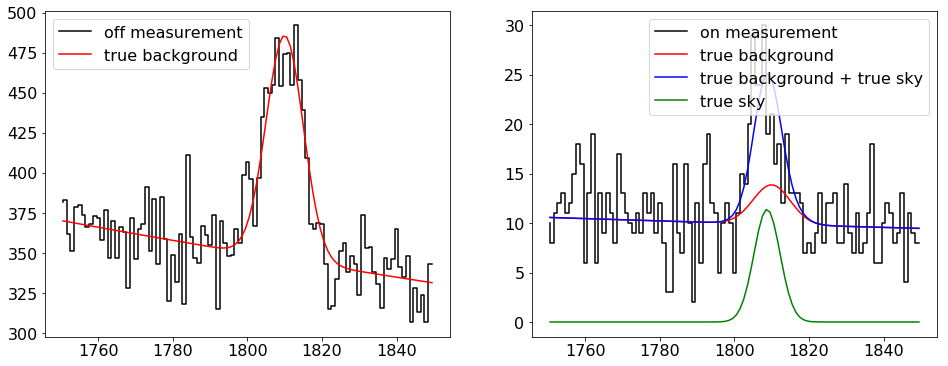

In [150]:
# plotting what's going on

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.step(ee,off_spec,label='off measurement')
plt.plot(ee,beta_off*bg_spec_true,label='true background')
plt.legend()
#plt.ylim(0,240)

plt.subplot(122)
plt.step(ee,on_spec,label='on measurement')
plt.plot(ee,beta_on*bg_spec_true,label='true background')
plt.plot(ee,beta_on*bg_spec_true + alpha_on*sky_spec_true,label='true background + true sky')
plt.plot(ee,alpha_on*sky_spec_true,label='true sky')
plt.legend()
#plt.ylim(0,24)

In [151]:
# rebinning to 3 bins

# yes, there are more elegant ways to do this
edx1 = np.where((ee > 1750) & (ee < 1803))[0]
edx2 = np.where((ee > 1803) & (ee < 1817))[0]
edx3 = np.where((ee > 1817) & (ee < 1850))[0]

ee_reb = np.zeros(3)
dee_reb = np.zeros(3)
ee_edges_reb = np.zeros(4)
off_spec_reb = np.zeros(3)
on_spec_reb = np.zeros(3)
sky_spec_reb = np.zeros(3)
bg_spec_reb = np.zeros(3)

ee_reb[0] = np.mean(ee[edx1])
ee_reb[1] = np.mean(ee[edx2])
ee_reb[2] = np.mean(ee[edx3])

dee_reb[0] = np.sum(dee[edx1])
dee_reb[1] = np.sum(dee[edx2])
dee_reb[2] = np.sum(dee[edx3])

ee_edges_reb[0] = ee_reb[0]-dee_reb[0]
ee_edges_reb[1] = ee_reb[1]-dee_reb[1]
ee_edges_reb[2] = ee_reb[2]-dee_reb[2]
ee_edges_reb[3] = ee_reb[2]+dee_reb[2]

off_spec_reb[0] = np.sum(off_spec[edx1])
off_spec_reb[1] = np.sum(off_spec[edx2])
off_spec_reb[2] = np.sum(off_spec[edx3])

on_spec_reb[0] = np.sum(on_spec[edx1])
on_spec_reb[1] = np.sum(on_spec[edx2])
on_spec_reb[2] = np.sum(on_spec[edx3])

sky_spec_reb[0] = np.sum(sky_spec_true[edx1])
sky_spec_reb[1] = np.sum(sky_spec_true[edx2])
sky_spec_reb[2] = np.sum(sky_spec_true[edx3])

bg_spec_reb[0] = np.sum(bg_spec_true[edx1])
bg_spec_reb[1] = np.sum(bg_spec_true[edx2])
bg_spec_reb[2] = np.sum(bg_spec_true[edx3])

In [152]:
def step_plot(x_edges,y_vals,plot_label='',**kwargs):
    """
    A nicer version of the matplotlib.pyplot.step function that shows all bins completely
    """
    n_x = len(y_vals)

    x_min = x_edges[0:-1]
    x_max = x_edges[1:]

    # loop over all x values
    for i in range(n_x-1):
        plt.plot([x_min[i],x_min[i+1]],np.repeat(y_vals[i],2),**kwargs)
        if ((i >= 0) & (i < n_x-1)):
            plt.plot(np.repeat(x_min[i+1],2),[y_vals[i],y_vals[i+1]],**kwargs)
    plt.plot([x_max[-2],x_max[-1]],np.repeat(y_vals[-1],2),**kwargs,label=plot_label)

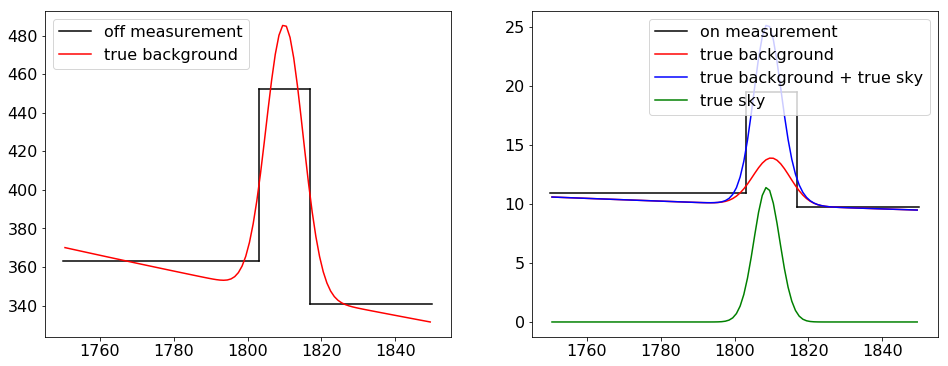

In [153]:
# it's important to see what actually is happening when you rebin to "flat" bins

plt.figure(figsize=(16,6))

plt.subplot(121)
step_plot(ee_edges_reb,off_spec_reb/dee_reb/2,plot_label='off measurement',color='black')
plt.plot(ee,beta_off*bg_spec_true,label='true background',color='red')
plt.legend()

plt.subplot(122)
step_plot(ee_edges_reb,on_spec_reb/dee_reb/2,plot_label='on measurement',color='black')
plt.plot(ee,beta_on*bg_spec_true,label='true background',color='red')
plt.plot(ee,beta_on*bg_spec_true + alpha_on*sky_spec_true,label='true background + true sky',color='blue')
plt.plot(ee,alpha_on*sky_spec_true,label='true sky',color='green')
plt.legend()

In [154]:
# definition of "background model template"
bg_model = off_spec_reb

# I normalise to the average of the counts/keV here so that a fit will return the number of photons
bg_model /= np.mean(bg_model)

# these are the b1, b2, b3 from above

In [155]:
# definition of the "sky model template"
# you see that the one central bin is not including the total line, but we ignore that at the moment
sky_model = np.array([0.,1.,0.])

sky_model /= np.mean(sky_model)

# this is s1, s2, s3 from above

In [156]:
# data
data = on_spec_reb

# d1, d2, d3

In [157]:
# set up a function like cstat above to fit for the parameters:
def spec_template_fit(theta,data,sky_model,bg_model):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # sky amplitude
    alpha = theta[0]
    
    # bg amplitude
    beta = theta[1]
    
    # model
    model = alpha*sky_model + beta*bg_model
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    if np.isfinite(stat) & (alpha >= 0) & (beta >= 0):
        # in fact we use a prior here, but never mind
        return stat
    else:
        return -np.inf

In [158]:
# quick check ML solution
# need to "minimise" here rather than maximise the likelihood
nll_spec = lambda *args: -spec_template_fit(*args)

res1 = minimize(nll_spec,    # function to minimise
                x0=[10.,10.],       # initial guess
                args=(data,            # data
                      sky_model,       # sky template 
                      bg_model))       # bg template
res1

      fun: -5900.460189428963
 hess_inv: array([[ 34.4874269 , -17.643952  ],
       [-17.643952  , 138.61702823]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 104
      nit: 22
     njev: 26
   status: 0
  success: True
        x: array([ 28.23807616, 363.09393999])

In [159]:
# extracting the results
alpha_fit = res1.x[0]
beta_fit = res1.x[1]

In [160]:
# comparison fit vs input
print('Background "counts" fit vs. true:')
print('Fit:  ',bg_model*beta_fit)
print('True: ',bg_spec_reb*beta_on)
print('')
print('Sky "counts" fit vs. true:')
print('Fit:  ',sky_model*alpha_fit)
print('True: ',sky_spec_reb*alpha_on)

Background "counts" fit vs. true:
Fit:   [569.18281372 187.28179701 332.81720925]
True:  [548.25609793 180.41868523 322.09734025]

Sky "counts" fit vs. true:
Fit:   [ 0.         84.71422849  0.        ]
True:  [ 4.992225   94.11367834  0.89409666]


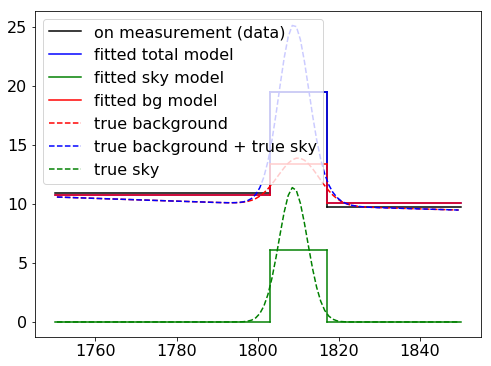

In [161]:
# plotting the ML result
# data
step_plot(ee_edges_reb,on_spec_reb/dee_reb/2,plot_label='on measurement (data)',color='black')

# fitted model
fit_sky = alpha_fit*sky_model
fit_bg = beta_fit*bg_model
fit_tot = fit_sky + fit_bg
step_plot(ee_edges_reb,fit_tot/dee_reb/2,plot_label='fitted total model',color='blue')
step_plot(ee_edges_reb,fit_sky/dee_reb/2,plot_label='fitted sky model',color='green')
step_plot(ee_edges_reb,fit_bg/dee_reb/2,plot_label='fitted bg model',color='red')

plt.plot(ee,beta_on*bg_spec_true,label='true background',color='red',linestyle='--')
plt.plot(ee,beta_on*bg_spec_true + alpha_on*sky_spec_true,label='true background + true sky',color='blue',linestyle='--')
plt.plot(ee,alpha_on*sky_spec_true,label='true sky',color='green',linestyle='--')
plt.legend()

<h3>Now I will use the emcee package to do the integrations from above numerically:</h3>

In [162]:
import emcee
import time

In [163]:
# here standard emcee workflow

# guess (as x0 from above)
init = np.array([100.,10000.])
# variation on the initial guess
init_var = init*1e-4

# dimensionality of the problem and defining multiple starting points for fir
ndim, nwalkers = 2, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

# taking time
start = time.time()

# setting up the sampler, i.e. the thing that holds the information about the fit
# and performs the iterative steps; otherwise similar to calling statement from above
sampler = emcee.EnsembleSampler(nwalkers,
                                ndim,
                                spec_template_fit,
                                args = (data,
                                        sky_model,
                                        bg_model))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler.run_mcmc(pos, iters, progress=True)

# taking time again
end = time.time()

# extract samples
samples = sampler.get_chain()
samplesf = sampler.flatchain

# for processing later
n_samples = iters
n_walkers = nwalkers
# variable names
labels = [r'$\alpha$',r'$\beta$']

# which things to throw away (cf. later)
burnin = int(0.5*n_samples)

ttime = end - start
print("Processing took {0:.1f} seconds".format(ttime))

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
100%|██████████| 2000/2000 [00:01<00:00, 1777.99it/s]

Processing took 1.1 seconds


In [164]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples[burnin:,:,i])
    std_val    = np.std(samples[burnin:,:,i])
    median_val = np.median(samples[burnin:,:,i])
    ub1_val    = np.percentile(samples[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  2.88e+01  5.85e+00  1.28e+01  2.29e+01  2.89e+01  3.47e+01  4.62e+01
        1:  3.63e+02  1.19e+01  3.30e+02  3.51e+02  3.62e+02  3.75e+02  4.01e+02


<h3>Ok, what is going on here:<br>
    The emcee package is doing (some version of) a Markov Chain Monte Carlo (MCMC) algorithm. The simplest one if the so-called Metropolis-Hastings algorithm, which is an accept-reject-algorithm where the target function is the likelihood. The more parameters (or data points) you provide in any model, the more complicated the likelihood function becomes. But now with all that stuff from above, the only thing you need are the marginalised probability distributions for your parameters - which you now know are 'just integragations' of the joint probability distribution. That is, the MCMC is performing this integration for you and returns the joint and marginalised distributions for you as a number of samples, which one can treat as realisations of the fitted parameters.<br>
    Because in the beginning, this algorithm starts at a random point (your initial guess), the first few samples are still trying to get to the optimum point, rather than 'exploring' the distribution. This phase is called burn-in or warm-up, and is discarded from the samples in the end. How to know how much to discard? Have a look:</h3>

<h3>Plotting the likelihood as a function of iteration:</h3>

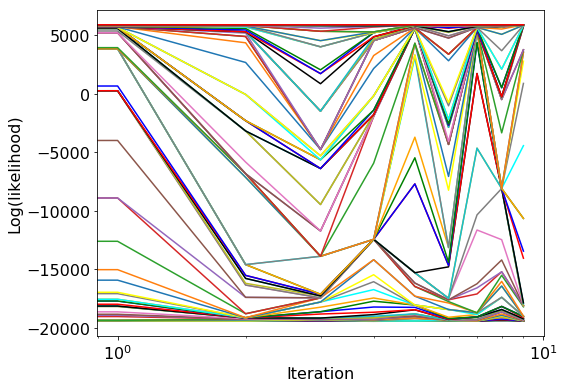

In [165]:
plt.plot(sampler.lnprobability)
plt.xlabel('Iteration')
plt.ylabel('Log(likelihood)')
plt.xscale('log')

<h3>We start this quasi-random-walk at some initial guess. This is typically a bad guess, so that the likelihood is small. We want to maximise it, and the random-walk than is actually not random but rather directed to the maximum. We start this walk with 10 'walkers' which are shown as the differently coloured lines here. Somewheere between iteration 10 and 100, the MC finds that the initial guess is bad, and walks toward a better one - maximising the likelihood. That means, beyond iteration 100, or to be safe beyond half of all iterations, the thing quasi-converged (it's not a real convergence), and we throw away the first 1000 samples here, or, as coded above, half of all.</h3>

<h3>Now the parameters:</h3>

In [166]:
truths = [alpha_on*np.mean(sky_spec_reb),beta_on*np.mean(bg_spec_reb)]

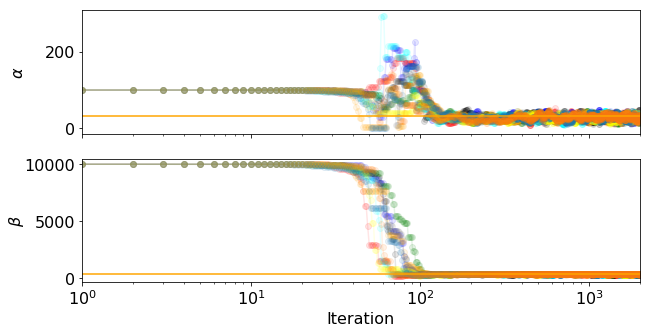

In [167]:
fig, axes = plt.subplots(2, figsize=(10, ndim*2.5), sharex=True)

for i in range(ndim):
    ax = axes[i]
    ax.plot(np.arange(n_samples),samples[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, n_samples)
    ax.plot([1,n_samples],[truths[i],truths[i]],color='orange')
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_xscale('log')

axes[-1].set_xlabel("Iteration");

<h3>Here you see the same effect: the first few (100) iterations are just looking for the optimal point. In particular for $\beta$, the guess was very far off, but nicely goes down to the true value, marked in orange. So, in the end we plot the distribution of $\alpha$, $\beta$, and $\alpha$ vs. $\beta$ in 'corner plot'.</h3>

In [168]:
import corner

In [169]:
samplesf.shape

(20000, 2)

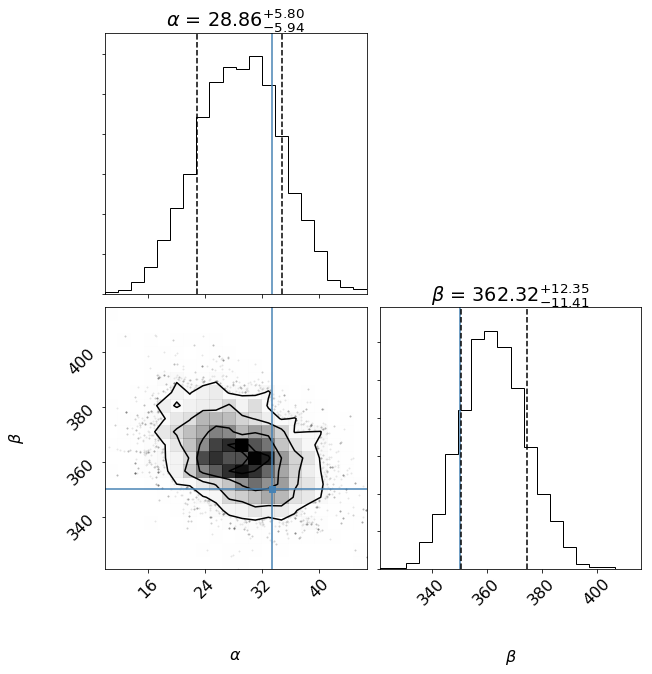

In [170]:
fig = corner.corner(samplesf[burnin*nwalkers:,:],
                    labels=labels,
                    truths=truths,
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

<h3>Welcome asymmetric uncertainties on $\alpha$.<br>
    The more samples you draw, the better (more accurate) your estimate becomes. Of course, since this is a stochastic process, the 'results' vary a little, depending on the number of iterations. If you had infinite time, you always get the same distribution by definition. Also, if you have infinite time, you can solve any problem with this approach. Though, typically, with more than 5 (or 10) parameters, the emcee algorithm breaks down and doesn't explore all the dimensions properly. But there are other algorithms that can - and when turn to model fitting in the full data space, we will use Stan instead of emcee.</h3>

<h3>Now, considering the plots from above, you see that using three broad bins is not necessarily the best approach to this problem, because, for example, the background line might be shifted wrt to line from 26Al, the wings of the lines are cut off into the continuum bins, the continuum actually isn't flat, and there might be more structure than just powerlaw-continuum plus line.<br>
    The approach we used above is straight-forwardly adapted by using not the three bins, but all the bins:</h3>

In [171]:
# definition of "background model template", now with all bins
bg_model = off_spec.astype(float)
bg_model /= np.mean(bg_model)

In [172]:
# definition of the sky model is somewhat changed here:
# we use an 'expected' line shape from the sky (and again ignore the continuum)
# we expect our line at exactly 1808.74 keV (for example), and with a line width of 3.5 keV
# so we make a sky model template from the definitions above:
sky_model = sky_spec_true
sky_model /= np.mean(sky_spec_true)

In [173]:
# the data is then just the full off-measurement
data = on_spec

In [174]:
# and exactly the same fit as above

# guess (as x0 from above)
init = np.array([100.,10000.])
# variation on the initial guess
init_var = init*1e-4

# dimensionality of the problem and defining multiple starting points for fir
ndim, nwalkers = 2, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

# taking time
start = time.time()

# setting up the sampler, i.e. the thing that holds the information about the fit
# and performs the iterative steps; otherwise similar to calling statement from above
sampler = emcee.EnsembleSampler(nwalkers,
                                ndim,
                                spec_template_fit,
                                args = (data,
                                        sky_model,
                                        bg_model))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler.run_mcmc(pos, iters, progress=True)

# taking time again
end = time.time()

# extract samples
samples = sampler.get_chain()
samplesf = sampler.flatchain

# for processing later
n_samples = iters
n_walkers = nwalkers
# variable names
labels = [r'$\alpha$',r'$\beta$']

# which things to throw away (cf. later)
burnin = int(0.5*n_samples)

ttime = end - start
print("Processing took {0:.1f} seconds".format(ttime))

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
100%|██████████| 2000/2000 [00:01<00:00, 1681.53it/s]

Processing took 1.2 seconds


In [175]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples[burnin:,:,i])
    std_val    = np.std(samples[burnin:,:,i])
    median_val = np.median(samples[burnin:,:,i])
    ub1_val    = np.percentile(samples[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  9.43e-01  1.78e-01  4.39e-01  7.64e-01  9.38e-01  1.12e+00  1.47e+00
        1:  1.08e+01  3.63e-01  9.82e+00  1.05e+01  1.08e+01  1.12e+01  1.19e+01


In [176]:
truths = [alpha_on*np.mean(sky_spec_true),beta_on*np.mean(bg_spec_true)]

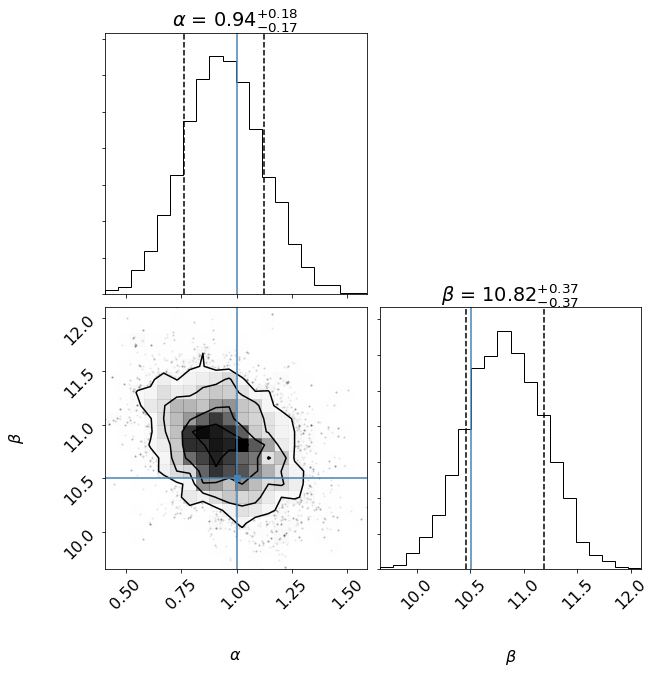

In [177]:
fig = corner.corner(samplesf[burnin*nwalkers:,:],
                    labels=labels,
                    truths=truths,
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

<h3>Let's plot this:<br>
    Each of the (accepted pair of) samples are one realisation, one draw, of the resulting distribution. That means each sample gives one model that 'fits' the data, whatever that means. Thus, we can calculate the model for many many many samples and get a distribution of models (rather than only its parameters). This we can compare to the data, and, for example, check the residuals (which should also be asymmetric!):</h3>

In [178]:
samples.shape

(2000, 10, 2)

In [179]:
# evaluate models according to sampling

# we calculate only the last 100 samples from each walker,
# because it will just take forever otherwise
n_use = 100
n_plot_samples = nwalkers*n_use

# we thus have 1000 model realisations for each of the 100 energy bins
y_models = np.zeros((len(ee),n_plot_samples))
# and since we can, we calculate that for the sky and background separately
y_models_sky = np.zeros((len(ee),n_plot_samples))
y_models_bg = np.zeros((len(ee),n_plot_samples))

last_x_samples = iters-n_use

for i in range(nwalkers*last_x_samples,nwalkers*last_x_samples+n_plot_samples):
    y_models_sky[:,i-nwalkers*last_x_samples] = samplesf[i,0]*sky_model
    y_models_bg[:,i-nwalkers*last_x_samples] = samplesf[i,1]*bg_model
    
y_models = y_models_sky + y_models_bg

In [180]:
y_models.shape

(100, 1000)

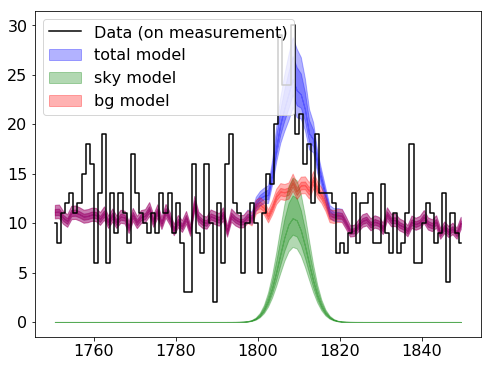

In [181]:
# and plotting the thing:

# data
plt.step(ee,on_spec,where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total model
    plt.fill_between(ee,
                     np.percentile(y_models,50-level/2,axis=1),
                     np.percentile(y_models,50+level/2,axis=1),
                     color='blue',alpha=0.3,label='total model')

    # sky model
    plt.fill_between(ee,
                     np.percentile(y_models_sky,50-level/2,axis=1),
                     np.percentile(y_models_sky,50+level/2,axis=1),
                     color='green',alpha=0.3,label='sky model')

    # bg model
    plt.fill_between(ee,
                     np.percentile(y_models_bg,50-level/2,axis=1),
                     np.percentile(y_models_bg,50+level/2,axis=1),
                     color='red',alpha=0.3,label='bg model')

# and a useful legend
plt.legend(['Data (on measurement)','total model','sky model','bg model'])

<h3>You see that the fit is picking something up for $\alpha$ (sky, green) and $\beta$ (background, red), simply because the red and green templates are fixed in shape: That means, the red background line cannot go higher because it is hold down by the neighbouring continuum. The remaining space is taken up by the green model.<br><br>
    You see that the red model is not very smooth as opposed to what we used as our sky model. This is because we didn't look infinite time at the off position. But models <em>should</em> be smooth in general to describe data (except, of course, if the model itself has edges, etc.). Smooth in this context doesn't (necesarily) mean to smooth the background template. This could be done, but would again ignore the information that the background (shape) is not determined exactly, but only to some extent. To include this uncertainty andmake the background also smooth, we first fit it (i.e. the off measurement) with an empirical function. We don't really care what the components are, but they shouldn't try to describe every high bin, but rather return the general shape. These shape parameters (for example, powerlaw index, width and position of the line) then have uncertainties, which we can include in the on-measurement fit as 'prior information'.<br><br>
    First: fit of the background spectrum:</h3>

In [182]:
def fit_background_spectrum(theta,ee,off_spec):
    
    # model, empirical shape of spectrum
    model = plaw_gaussian(ee,theta)
    
    # cstat as above 
    stat = -2*np.sum(model - off_spec*np.log(model))
    
    # the amplitudes are supposed to be positive
    # and the line should be inside the window where we look
    if np.isfinite(stat) & (theta[0] >= 0) & (theta[2] >= 0) & (theta[3] >= 1800) & (theta[3] <= 1820) & (theta[4] > 0):
        # note that if you leave E0 free, for example, the fit explodes
        return stat
    else:
        return -np.inf

In [183]:
# emcee workflow

# guess 
init = np.copy(par_bg)
# variation on the initial guess
init_var = init*1e-5

# dimensionality of the problem and defining multiple starting points for fir
ndim, nwalkers = len(init), 20
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

# taking time
start = time.time()

# setting up the sampler
sampler = emcee.EnsembleSampler(nwalkers,
                                ndim,
                                fit_background_spectrum,
                                args = (ee,
                                        off_spec))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 10000
_ = sampler.run_mcmc(pos, iters, progress=True)

# taking time again
end = time.time()

# extract samples
samples = sampler.get_chain()
samplesf = sampler.flatchain

# for processing later
n_samples = iters
n_walkers = nwalkers
# variable names
labels = [r'$C_0$',r'$\alpha$',r'$A_0$',r'$E_0$',r'$\sigma$']

# which things to throw away (cf. later)
burnin = int(0.5*n_samples)

ttime = end - start
print("Processing took {0:.1f} seconds".format(ttime))

  1%|          | 75/10000 [00:00<00:13, 743.20it/s]/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
100%|██████████| 10000/10000 [00:10<00:00, 911.56it/s]

Processing took 11.0 seconds


In [184]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples[burnin:,:,i])
    std_val    = np.std(samples[burnin:,:,i])
    median_val = np.median(samples[burnin:,:,i])
    ub1_val    = np.percentile(samples[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  3.50e+02  1.58e+00  3.46e+02  3.49e+02  3.50e+02  3.52e+02  3.55e+02
        1: -2.05e+00  2.41e-01 -2.78e+00 -2.29e+00 -2.04e+00 -1.81e+00 -1.33e+00
        2:  1.77e+03  9.00e+01  1.51e+03  1.68e+03  1.77e+03  1.86e+03  2.05e+03
        3:  1.81e+03  2.67e-01  1.81e+03  1.81e+03  1.81e+03  1.81e+03  1.81e+03
        4:  5.26e+00  2.64e-01  4.52e+00  5.00e+00  5.25e+00  5.52e+00  6.12e+00


In [185]:
truths = [par_bg[0]*beta_off,par_bg[1],par_bg[2]*beta_off,par_bg[3],par_bg[4]]

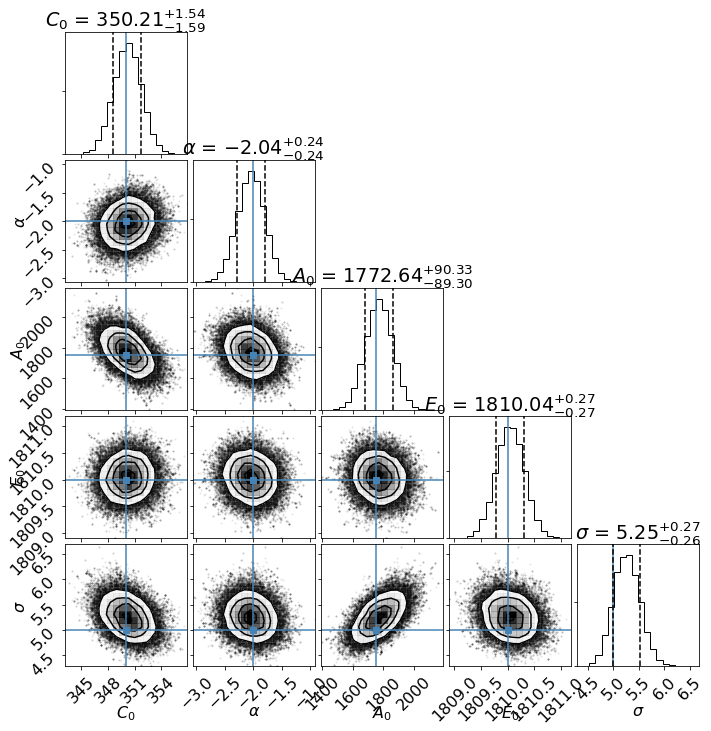

In [186]:
fig = corner.corner(samplesf[burnin*nwalkers:,:],
                    labels=labels,
                    truths=truths,
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

<h3>You see that the off measurement is somwhere around the true background, and has some uncertainties. All distributions are relatively Gaussian, so that we can use the mean values and symmetric uncertainties on $C_0$, $\alpha$, $A_0$, $E_0$, and $\sigma$ to define a spectral background model template as before.</h3>

In [187]:
bg_spec_params = np.array([spec_params[:,0],spec_params[:,1]])

<h3>Now, how do we include the unceratinties from the background model template in our fit? We define a fitting function for the on data that calculates a background model internally, and uses only the range of parameters to choose from that we allow from this previous background fit:</h3>

In [188]:
# new on measurement fitting function that ioncludes background uncertainties
def spec_template_fit_bg(theta,ee,data,sky_model):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # sky amplitude
    alpha = theta[0]
    
    # bg amplitude
    beta = theta[1]
    
    # the only two lines that change
    # background praameters
    bg_pars = theta[2:]
    
    # background model
    bg_model = plaw_gaussian(ee,bg_pars)
    bg_model /= np.mean(bg_model)
    
    # model
    model = alpha*sky_model + beta*bg_model
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    if np.isfinite(stat) & (alpha >= 0) & (beta >= 0) & (theta[2] >= 0) & (theta[4] >= 0):
        # in fact we use a prior here, but never mind
        return stat
    else:
        return -np.inf
    
# in addition to the likelihood function, we define a prior function:
def bg_spec_lnprior(theta,bg_spec_params):
    # the thetas here are the same as above, but we are only interested in theta[2:6],
    # which are the background spectrum shape parameters
    
    # the bg_spec_params are an 5x2 array which include the means and stds for the previously fitted bg
    # i.e. theta[2] corresponds to bg_spec_params[0], etc., and we have only 5 parameters to consider
    
    # init the prior to zero
    lnprior = 0.
    
    for i in range(5):
        lnprior += -0.5*(theta[i+2]-bg_spec_params[0,i])**2/bg_spec_params[1,i]**2
        # this is a gaussian (normal) prior for all the parameters, and logarithmised
    
    return lnprior

# and finally to combine the two (likelihood and prior), we multiply their probabilities,
# on in log space, we just add them together.
# This is called a posterior probability distribution
def lnposterior_spec_template_fit2(theta,ee,data,sky_model,bg_spec_params):
    # prior
    lp = bg_spec_lnprior(theta,bg_spec_params)
    
    # check if useful
    if not np.isfinite(lp):
        return -np.inf
    # otherwise add them together
    else:
        return lp + spec_template_fit_bg(theta,ee,data,sky_model)

In [189]:
# emcee workflow

# guess 
# now we have 7(!) parameters, and we better give a somewhat useful guess now
init = np.array([0.1]+[2.0]+list(bg_spec_params[0,:]))
# variation on the initial guess
init_var = init*1e-5

# dimensionality of the problem and defining multiple starting points for fir
ndim, nwalkers = len(init), 20
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

# taking time
start = time.time()

# setting up the sampler
sampler = emcee.EnsembleSampler(nwalkers,
                                ndim,
                                lnposterior_spec_template_fit2,
                                args = (ee,
                                        on_spec,
                                        sky_model,
                                        bg_spec_params))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 10000
_ = sampler.run_mcmc(pos, iters, progress=True)

# taking time again
end = time.time()

# extract samples
samples = sampler.get_chain()
samplesf = sampler.flatchain

# for processing later
n_samples = iters
n_walkers = nwalkers
# variable names
labels = [r'$\alpha$ (SKY amp.)',r'$\beta$',r'$C_0$',r'$\alpha$ (BG plaw idx)',r'$A_0$',r'$E_0$',r'$\sigma$']

# which things to throw away (cf. later)
burnin = int(0.5*n_samples)

ttime = end - start
print("Processing took {0:.1f} seconds".format(ttime))

100%|██████████| 10000/10000 [00:17<00:00, 562.08it/s]

Processing took 17.8 seconds


In [190]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples[burnin:,:,i])
    std_val    = np.std(samples[burnin:,:,i])
    median_val = np.median(samples[burnin:,:,i])
    ub1_val    = np.percentile(samples[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  9.38e-01  1.77e-01  4.25e-01  7.60e-01  9.37e-01  1.11e+00  1.48e+00
        1:  1.08e+01  3.58e-01  9.81e+00  1.05e+01  1.08e+01  1.12e+01  1.19e+01
        2:  3.50e+02  1.55e+00  3.46e+02  3.49e+02  3.50e+02  3.52e+02  3.55e+02
        3: -2.08e+00  2.39e-01 -2.82e+00 -2.31e+00 -2.08e+00 -1.84e+00 -1.33e+00
        4:  1.77e+03  9.08e+01  1.49e+03  1.68e+03  1.77e+03  1.86e+03  2.03e+03
        5:  1.81e+03  2.69e-01  1.81e+03  1.81e+03  1.81e+03  1.81e+03  1.81e+03
        6:  5.25e+00  2.64e-01  4.45e+00  4.99e+00  5.25e+00  5.51e+00  6.03e+00


In [191]:
bg_spec_params

array([[ 3.50195373e+02, -2.04525367e+00,  1.77333053e+03,
         1.81004436e+03,  5.25964195e+00],
       [ 1.57791091e+00,  2.41033908e-01,  9.00419838e+01,
         2.67440884e-01,  2.64084566e-01]])

<h3>Parameters 2 to 6 should now be exactly the input parameters, plus somewhat variation.<br>
    Comparing the means and stds with the input, we see that we properly propagated the uncertainties of the background measurement, which then reflects in the parameters $\alpha$ and $\beta$ that we are interested in.</h3>

In [192]:
truths = [alpha_on*np.mean(sky_spec_true),
          beta_on*np.mean(bg_spec_true),
          par_bg[0]*beta_off,
          par_bg[1],
          par_bg[2]*beta_off,
          par_bg[3],
          par_bg[4]]

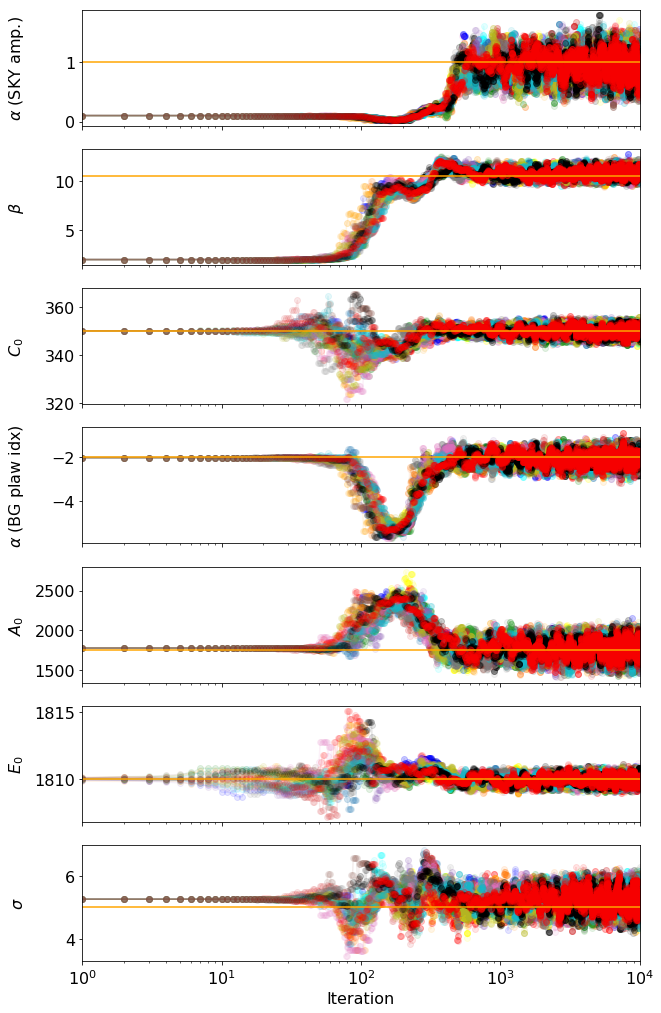

In [193]:
fig, axes = plt.subplots(ndim, figsize=(10, ndim*2.5), sharex=True)

for i in range(ndim):
    ax = axes[i]
    ax.plot(np.arange(n_samples),samples[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, n_samples)
    ax.plot([1,n_samples],[truths[i],truths[i]],color='orange')
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_xscale('log')

axes[-1].set_xlabel("Iteration");

In [194]:
# evaluate models according to sampling

# we calculate only the last 100 samples from each walker,
# because it will just take forever otherwise
n_use = 100
n_plot_samples = nwalkers*n_use

# we thus have 1000 model realisations for each of the 100 energy bins
y_models = np.zeros((len(ee),n_plot_samples))
# and since we can, we calculate that for the sky and background separately
y_models_sky = np.zeros((len(ee),n_plot_samples))
y_models_bg = np.zeros((len(ee),n_plot_samples))

last_x_samples = iters-n_use

for i in range(nwalkers*last_x_samples,nwalkers*last_x_samples+n_plot_samples):
    y_models_sky[:,i-nwalkers*last_x_samples] = samplesf[i,0]*sky_model
    bg_model_tmp = plaw_gaussian(ee,samplesf[i,2:])
    bg_model_tmp /= np.mean(bg_model_tmp)
    y_models_bg[:,i-nwalkers*last_x_samples] = samplesf[i,1]*bg_model_tmp
    
y_models = y_models_sky + y_models_bg

(0, 31.5)

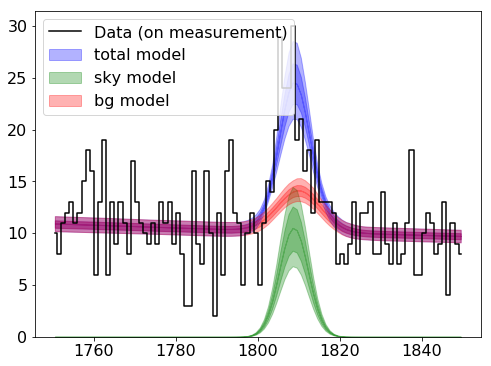

In [195]:
# and plotting the thing:

# data
plt.step(ee,on_spec,where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total model
    plt.fill_between(ee,
                     np.percentile(y_models,50-level/2,axis=1),
                     np.percentile(y_models,50+level/2,axis=1),
                     color='blue',alpha=0.3,label='total model')

    # sky model
    plt.fill_between(ee,
                     np.percentile(y_models_sky,50-level/2,axis=1),
                     np.percentile(y_models_sky,50+level/2,axis=1),
                     color='green',alpha=0.3,label='sky model')

    # bg model
    plt.fill_between(ee,
                     np.percentile(y_models_bg,50-level/2,axis=1),
                     np.percentile(y_models_bg,50+level/2,axis=1),
                     color='red',alpha=0.3,label='bg model')

# and a useful legend
plt.legend(['Data (on measurement)','total model','sky model','bg model'])
plt.ylim(0,)

<h3>Now we have a nice smooth description of our on measurement data.<br><br>
    As you can image, we are still not done yet. We could, for example, do the same for the sky! We used a fixed sky model template for a line at 1808.74 keV and with a width of 3.5 keV (instrumental resolution plus something from the sky), and said that the continuum was zero. That means, we always will find a line at exactly this position with exactly this shape. Of course, it can also be zero, but we won't find out how broad the line really is, or what the real centroid is, etc.<br>
    Since we are probably dealing with a $1$-$4\sigma$ signal, we can be happy if this works out at all.<br><br>
    Just one more comment, which one might in fact do:<br>
    We actually fir the background twice in this approach. This would not be required if we treated both data sets, i.e. the off- and the on-measurement, at the same time. The shape of the background is the same in both data sets, so that we actually would only need this one model to apply for both data sets, and one data set (on) also gets an addition from the sky. This would avoid fitting things twice and weirdly propagating the uncertainties from a previous fit and assuming they are Gaussian distributed (which, as you now know, is not generally the case).</h3>

<h3>Background subtracted spectrum:</h3>

In [196]:
(on_spec[:,None] - y_models_bg).shape

(100, 2000)

In [197]:
sky_spec = np.median(on_spec[:,None] - y_models_bg,axis=1)
sky_spec_err_wrong = np.sqrt(on_spec) # this is wrong but I am confused right now, need to do math
sky_spec_err = np.sqrt(np.median(y_models,axis=1))

Text(0, 0.5, 'Counts/s/keV')

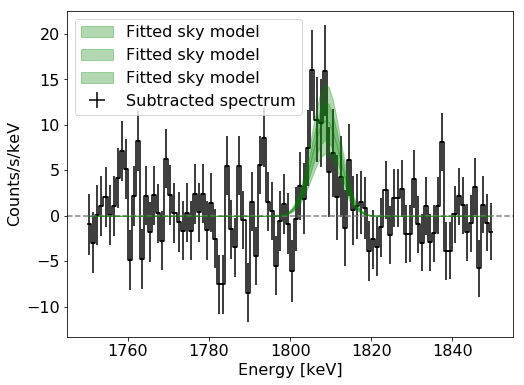

In [198]:
plt.errorbar(ee,sky_spec,
             xerr=dee,yerr=sky_spec_err,
             linestyle='',marker='',label='Subtracted spectrum')
plt.step(ee,sky_spec,where='mid',color='black')

for level in [0,68.3,95.4]:
    # sky model
    plt.fill_between(ee,
                     np.percentile(y_models_sky,50-level/2,axis=1),
                     np.percentile(y_models_sky,50+level/2,axis=1),
                     color='green',alpha=0.3,zorder=100,label='Fitted sky model')

plt.axhline(linestyle='--',color='gray')
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s/keV')

<h3>And rebinned:</h3>

In [199]:
import numpy as np

def bin_ndarray(ndarray, new_shape, operation='sum'):
    """
    Bins an ndarray in all axes based on the target shape, by summing or
        averaging.
    Number of output dimensions must match number of input dimensions.
    Example
    -------
    >>> m = np.arange(0,100,1).reshape((10,10))
    >>> n = bin_ndarray(m, new_shape=(5,5), operation='sum')
    >>> print(n)
    [[ 22  30  38  46  54]
     [102 110 118 126 134]
     [182 190 198 206 214]
     [262 270 278 286 294]
     [342 350 358 366 374]]
    """
    if not operation.lower() in ['sum', 'mean', 'average', 'avg']:
        raise ValueError("Operation {} not supported.".format(operation))
    if ndarray.ndim != len(new_shape):
        raise ValueError("Shape mismatch: {} -> {}".format(ndarray.shape,
                                                           new_shape))
    compression_pairs = [(d, c//d) for d, c in zip(new_shape,
                                                   ndarray.shape)]
    flattened = [l for p in compression_pairs for l in p]
    ndarray = ndarray.reshape(flattened)
    for i in range(len(new_shape)):
        if operation.lower() == "sum":
            ndarray = ndarray.sum(-1*(i+1))
        elif operation.lower() in ["mean", "average", "avg"]:
            ndarray = ndarray.mean(-1*(i+1))
    return ndarray

In [200]:
rf = 25

ee2 = bin_ndarray(ee,(rf,),operation='avg')
dee2 = bin_ndarray(dee,(rf,),operation='sum')
sky_spec2 = bin_ndarray(sky_spec,(rf,),operation='avg')
sky_spec2_err_wrong = np.sqrt(bin_ndarray(on_spec,(rf,),operation='sum'))/(dee2*2)
sky_spec2_err = np.sqrt(bin_ndarray(np.median(y_models,axis=1),(rf,),operation='sum'))/(dee2*2)

Text(0, 0.5, 'Counts/s/keV')

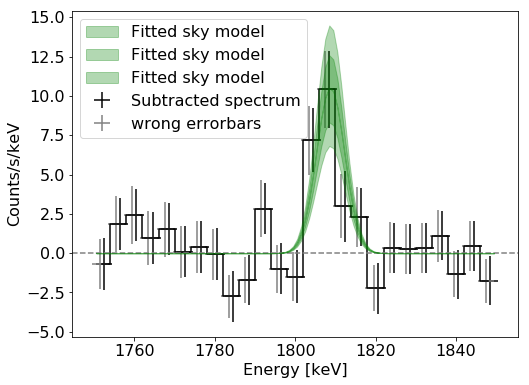

In [201]:
plt.errorbar(ee2+0.5,sky_spec2,
             xerr=dee2,yerr=sky_spec2_err,
             linestyle='',marker='',label='Subtracted spectrum')
plt.errorbar(ee2-0.5,sky_spec2,
             xerr=dee2,yerr=sky_spec2_err_wrong,
             linestyle='',marker='',label='wrong errorbars',
             color='gray')
plt.step(ee2,sky_spec2,where='mid',color='black')

for level in [0,68.3,95.4]:
    # sky model
    plt.fill_between(ee,
                     np.percentile(y_models_sky,50-level/2,axis=1),
                     np.percentile(y_models_sky,50+level/2,axis=1),
                     color='green',alpha=0.3,zorder=100,label='Fitted sky model')

plt.axhline(linestyle='--',color='gray')
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s/keV')

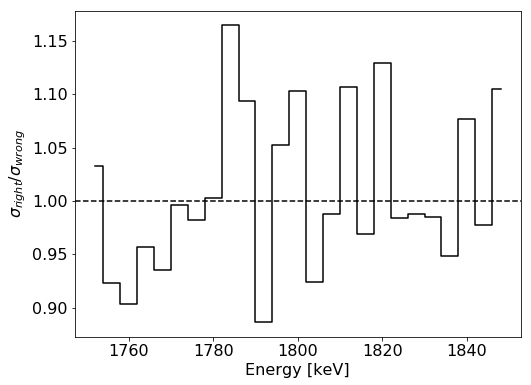

In [202]:
plt.step(ee2,sky_spec2_err/sky_spec2_err_wrong,where='mid')
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\sigma_{right}/\sigma_{wrong}$')
plt.axhline(1,linestyle='--')

<h3>Fitting the line position without a million MEGAlib simulations to get the spectral shape at other positions:<br>
The idea is: now you have simulated the spectrum once, at the lab energy, for the DIRBE map, 25 times to get a nice smooth spetral response. If you do the same simulation at an energy $E_{lab}-0.5\,\mathrm{keV}$, the spectrum will be exactly the same, just shifted by 0.5 keV. This is true for small Doppler shifts since the response doesn't change very much in, say, 10 keV, and the Doppler shifts, we are interested in are not relativistic.<br>
That means, instead of an energy array $[1750-1850\,\mathrm{keV}]$ where the line appears at the position $E_{lab}$, we create a shifted energy array $[1750-1850\,\mathrm{keV}] + \Delta E$, where $\Delta E$ is related to the Doppler shift we are interested in, and interpolate the old spectrum onto the new array. This provides us with an energy-dependent template, where the line just moves left and right.<br>
First, interpolation of a spectrum to shift the whole thing:</h3>

In [203]:
from scipy.interpolate import interp1d as interpol

<h3>What is interpol doing: it creates a function that uses the entered x and y values and returns the interpolated values that you produce in the call to that function. For example without any magic:</h3>

In [204]:
sky_model_interp = interpol(ee,sky_model)

Text(0, 0.5, 'Counts/s/keV')

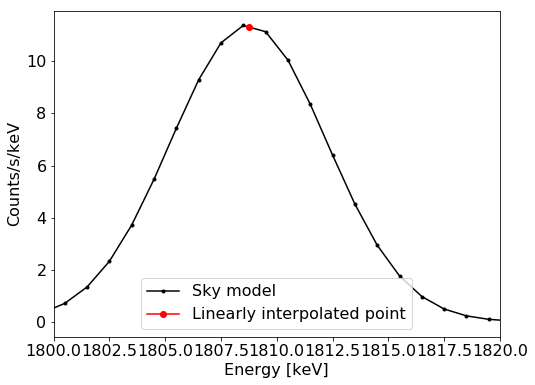

In [205]:
plt.plot(ee,sky_model,'.-',label='Sky model')
E_lab = 1808.74
plt.plot(E_lab,sky_model_interp(E_lab),color='red',marker='o',label='Linearly interpolated point')
plt.xlim(1800,1820)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s/keV')

<h3>The black dots are the actualy model. The black solid line is just a "link" between the dots. This link is linear from one point to another, and exactly what the interpolation function is doing: place the point for which we give the energy on that line.<br>
    Now there are other interpolations like cubic spline:</h3>

In [206]:
sky_model_interp_spline = interpol(ee,sky_model,kind='cubic')

Text(0, 0.5, 'Counts/s/keV')

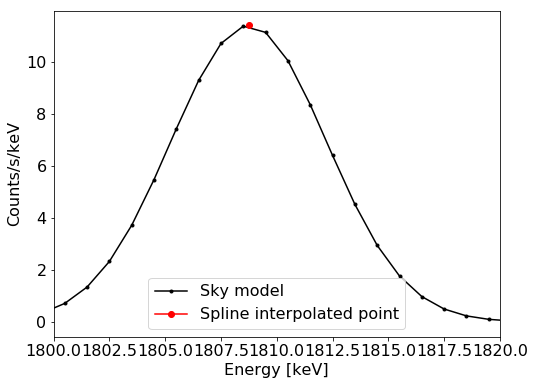

In [207]:
plt.plot(ee,sky_model,'.-',label='Sky model')
E_lab = 1808.74
plt.plot(E_lab,sky_model_interp_spline(E_lab),color='red',marker='o',label='Spline interpolated point')
plt.xlim(1800,1820)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s/keV')

<h3>Here you now see that the point is actually above the linear thing because the interpolation is fitting (determining) a cube function between 3 neighbouring points, and the return value is on that new interpolated line.<br>
    If we plot the interpolation function for that entire region, it becomes clearer:</h3>

In [208]:
e3 = np.linspace(1800,1820,1000)

(9, 12)

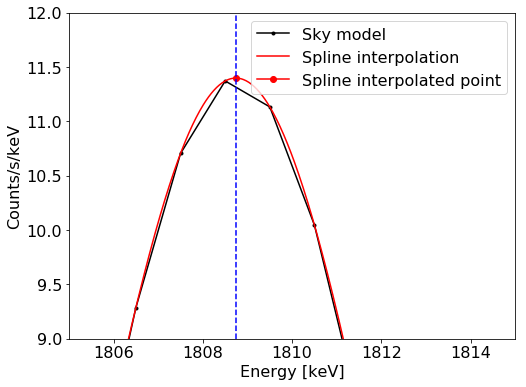

In [209]:
plt.plot(ee,sky_model,'.-',label='Sky model')
plt.plot(e3,sky_model_interp_spline(e3),color='red',label='Spline interpolation')
plt.plot(E_lab,sky_model_interp_spline(E_lab),color='red',marker='o',label='Spline interpolated point')
plt.axvline(E_lab,color='blue',linestyle='--')
plt.xlim(1805,1815)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s/keV')
plt.ylim(9,12)

<h3>You see how the lab energy is not actually the highest point in the spectrum as by definition.<br><br>
    Now we use the interpolation function but with a shifted energy array to produce a line at $E_{lab} + 1.87\,\mathrm{keV}$:</h3>

In [210]:
dE = 1.87
sky_model_dE = interpol(ee+dE,sky_model,kind='linear',bounds_error=False,fill_value=0)

Text(0, 0.5, 'Counts/s/keV')

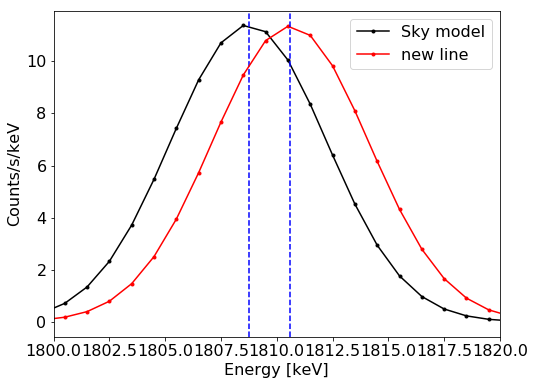

In [211]:
plt.plot(ee,sky_model,'.-',label='Sky model')
plt.axvline(E_lab,color='blue',linestyle='--')
plt.plot(ee,sky_model_dE(ee),color='red',marker='.',label='new line')
plt.axvline(E_lab+dE,color='blue',linestyle='--')
plt.xlim(1800,1820)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s/keV')

<h3>Easy as that.<br>
    What do the additional keywords mean:<br>
    bounds_error=False: because if I use a shifted energy array from 1752-1852 and want to know its value at 1750, I would actually fall out of bounds, so I say, this is actually possible.
    fill_value=0: and if a valur out of bounds is predicted, let this value be zero. There is also extrapolation available, but we don't need that here since the very far sides of the line is always zero.<br><br>
    Now to make a function out of that in the fitting routine, you can image that dE is just another fitting parameter:</h3>

In [212]:
# new on measurement fitting function that ioncludes background uncertainties
def spec_template_fit_bg_wcentroid(theta,ee,data,sky_model):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # sky amplitude
    alpha = theta[0]
    
    # sky centroid shift
    dE = theta[1]
    
    # bg amplitude
    beta = theta[2]
    
    # the only two lines that change
    # background praameters
    bg_pars = theta[3:]
    
    # background model
    bg_model = plaw_gaussian(ee,bg_pars)
    bg_model /= np.mean(bg_model)
    
    # sky model
    sky_model_dE = interpol(ee+dE,sky_model,kind='cubic',bounds_error=False,fill_value=0)
    sky_model_shifted = sky_model_dE(ee)
    
    # model
    model = alpha*sky_model_shifted + beta*bg_model
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    if np.isfinite(stat) & (alpha >= 0) & (beta >= 0) & (theta[3] >= 0) & (theta[5] >= 0) & ((dE > -10) & (dE < +10)):
        # in fact we use a prior here, but never mind
        return stat
    else:
        return -np.inf
    
# in addition to the likelihood function, we define a prior function:
def bg_spec_lnprior_wcentroid(theta,bg_spec_params):
    # the thetas here are the same as above, but we are only interested in theta[2:6],
    # which are the background spectrum shape parameters
    
    # the bg_spec_params are an 5x2 array which include the means and stds for the previously fitted bg
    # i.e. theta[2] corresponds to bg_spec_params[0], etc., and we have only 5 parameters to consider
    
    # init the prior to zero
    lnprior = 0.
    
    for i in range(5):
        lnprior += -0.5*(theta[i+3]-bg_spec_params[0,i])**2/bg_spec_params[1,i]**2
        # this is a gaussian (normal) prior for all the parameters, and logarithmised
    
    return lnprior

# and finally to combine the two (likelihood and prior), we multiply their probabilities,
# on in log space, we just add them together.
# This is called a posterior probability distribution
def lnposterior_spec_template_fit2_wcentroid(theta,ee,data,sky_model,bg_spec_params):
    # prior
    lp = bg_spec_lnprior_wcentroid(theta,bg_spec_params)
    
    # check if useful
    if not np.isfinite(lp):
        return -np.inf
    # otherwise add them together
    else:
        return lp + spec_template_fit_bg_wcentroid(theta,ee,data,sky_model)

<h3>And fitting the new model:</h3>

In [213]:
# emcee workflow

# guess 
# now we have 8(!) parameters, and we better give a somewhat useful guess now
init = np.array([0.1*10,0.1]+[2.0*10]+list(bg_spec_params[0,:]))
# variation on the initial guess
init_var = init*1e-5

# dimensionality of the problem and defining multiple starting points for fir
ndim, nwalkers = len(init), 30
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

# taking time
start = time.time()

# setting up the sampler
sampler = emcee.EnsembleSampler(nwalkers,
                                ndim,
                                lnposterior_spec_template_fit2_wcentroid,
                                args = (ee,
                                        on_spec,
                                        sky_model,
                                        bg_spec_params))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 10000
_ = sampler.run_mcmc(pos, iters, progress=True)

# taking time again
end = time.time()

# extract samples
samples = sampler.get_chain()
samplesf = sampler.flatchain

# for processing later
n_samples = iters
n_walkers = nwalkers
# variable names
labels = [r'$\alpha$ (SKY amp.)',r'$\Delta E$',r'$\beta$',r'$C_0$',r'$\alpha$ (BG plaw idx)',r'$A_0$',r'$E_0$',r'$\sigma$']

# which things to throw away (cf. later)
burnin = int(0.5*n_samples)

ttime = end - start
print("Processing took {0:.1f} seconds".format(ttime))

100%|██████████| 10000/10000 [01:42<00:00, 97.72it/s]

Processing took 102.4 seconds


In [214]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples[burnin:,:,i])
    std_val    = np.std(samples[burnin:,:,i])
    median_val = np.median(samples[burnin:,:,i])
    ub1_val    = np.percentile(samples[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  9.18e-01  1.75e-01  4.26e-01  7.43e-01  9.12e-01  1.10e+00  1.48e+00
        1: -1.07e+00  7.35e-01 -3.33e+00 -1.80e+00 -1.07e+00 -3.45e-01  1.24e+00
        2:  1.08e+01  3.59e-01  9.79e+00  1.05e+01  1.08e+01  1.12e+01  1.19e+01
        3:  3.50e+02  1.57e+00  3.46e+02  3.49e+02  3.50e+02  3.52e+02  3.55e+02
        4: -2.08e+00  2.43e-01 -2.79e+00 -2.33e+00 -2.08e+00 -1.84e+00 -1.36e+00
        5:  1.77e+03  9.01e+01  1.50e+03  1.68e+03  1.77e+03  1.86e+03  2.04e+03
        6:  1.81e+03  2.63e-01  1.81e+03  1.81e+03  1.81e+03  1.81e+03  1.81e+03
        7:  5.23e+00  2.59e-01  4.44e+00  4.98e+00  5.23e+00  5.49e+00  6.03e+00


In [215]:
truths = [alpha_on*np.mean(sky_spec_true),
          0,
          beta_on*np.mean(bg_spec_true),
          par_bg[0]*beta_off,
          par_bg[1],
          par_bg[2]*beta_off,
          par_bg[3],
          par_bg[4]]

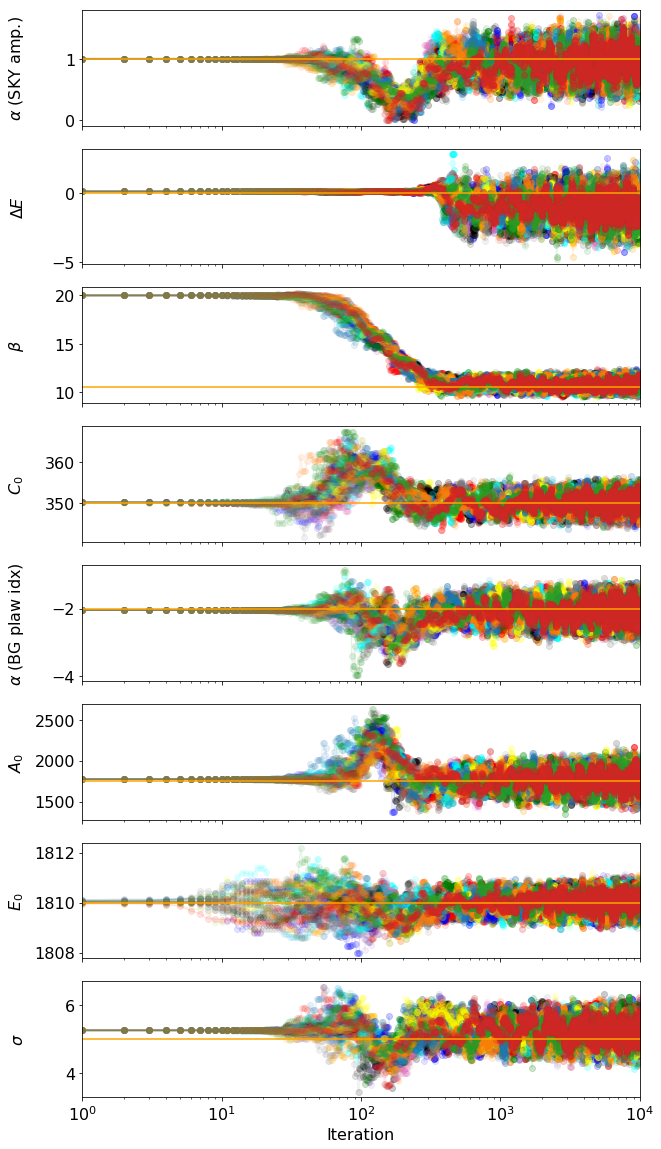

In [216]:
fig, axes = plt.subplots(ndim, figsize=(10, ndim*2.5), sharex=True)

for i in range(ndim):
    ax = axes[i]
    ax.plot(np.arange(n_samples),samples[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, n_samples)
    ax.plot([1,n_samples],[truths[i],truths[i]],color='orange')
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_xscale('log')

axes[-1].set_xlabel("Iteration");

In [217]:
# evaluate models according to sampling

# we calculate only the last 100 samples from each walker,
# because it will just take forever otherwise
n_use = 100
n_plot_samples = nwalkers*n_use

# we thus have 1000 model realisations for each of the 100 energy bins
y_models = np.zeros((len(ee),n_plot_samples))
# and since we can, we calculate that for the sky and background separately
y_models_sky = np.zeros((len(ee),n_plot_samples))
y_models_bg = np.zeros((len(ee),n_plot_samples))

last_x_samples = iters-n_use

for i in range(nwalkers*last_x_samples,nwalkers*last_x_samples+n_plot_samples):
    # need to calculate interpolation in each step here:
    sky_model_dE = interpol(ee+samplesf[i,1],sky_model,kind='linear',bounds_error=False,fill_value=0)
    sky_model_shifted = sky_model_dE(ee)
    # to then calculate posteriors
    y_models_sky[:,i-nwalkers*last_x_samples] = samplesf[i,0]*sky_model_shifted
    bg_model_tmp = plaw_gaussian(ee,samplesf[i,3:])
    bg_model_tmp /= np.mean(bg_model_tmp)
    y_models_bg[:,i-nwalkers*last_x_samples] = samplesf[i,2]*bg_model_tmp
    
y_models = y_models_sky + y_models_bg

(0, 31.5)

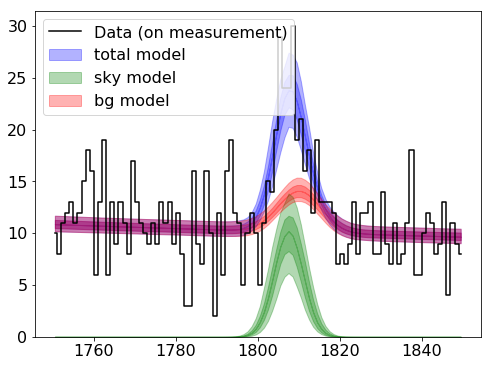

In [218]:
# and plotting the thing:

# data
plt.step(ee,on_spec,where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total model
    plt.fill_between(ee,
                     np.percentile(y_models,50-level/2,axis=1),
                     np.percentile(y_models,50+level/2,axis=1),
                     color='blue',alpha=0.3,label='total model')

    # sky model
    plt.fill_between(ee,
                     np.percentile(y_models_sky,50-level/2,axis=1),
                     np.percentile(y_models_sky,50+level/2,axis=1),
                     color='green',alpha=0.3,label='sky model')

    # bg model
    plt.fill_between(ee,
                     np.percentile(y_models_bg,50-level/2,axis=1),
                     np.percentile(y_models_bg,50+level/2,axis=1),
                     color='red',alpha=0.3,label='bg model')

# and a useful legend
plt.legend(['Data (on measurement)','total model','sky model','bg model'])
plt.ylim(0,)

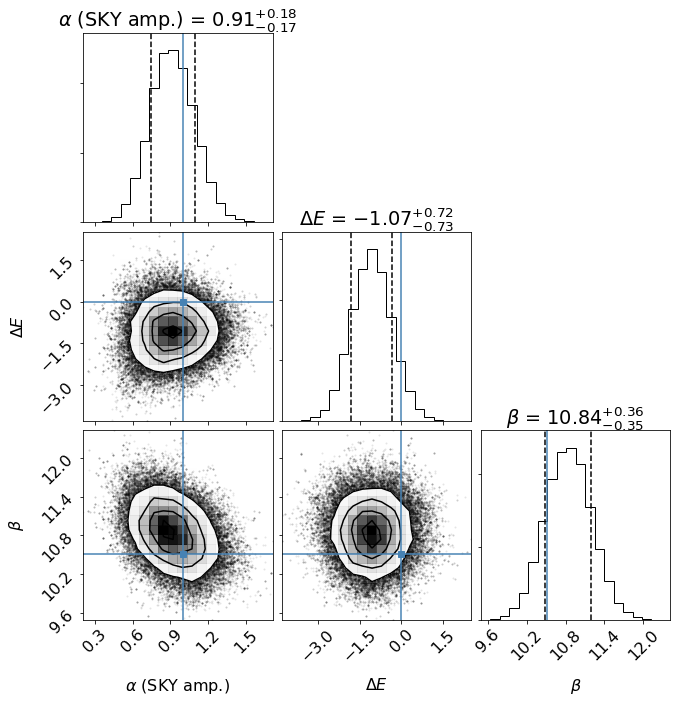

In [219]:
fig = corner.corner(samplesf[burnin*nwalkers:,0:3],
                    labels=labels[0:3],
                    truths=truths[0:3],
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

<h3>Could also broaden the thing?</h3>

In [220]:
E_lab

1808.74

Text(0, 0.5, 'Counts/s/keV')

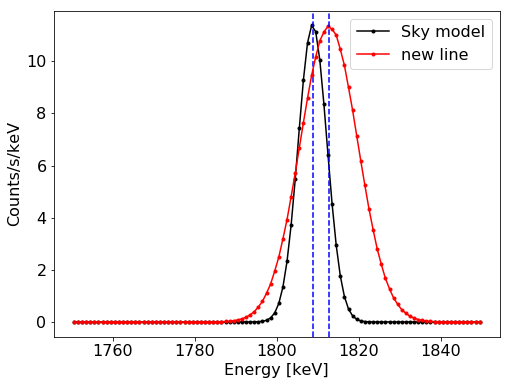

In [221]:
dE = 4.0
sE = 2
sky_model_dE = interpol((ee-E_lab)*sE+(E_lab+dE),sky_model,kind='linear',bounds_error=False,fill_value=0)
plt.plot(ee,sky_model,'.-',label='Sky model')
plt.axvline(E_lab,color='blue',linestyle='--')
plt.plot(ee,sky_model_dE(ee),color='red',marker='.',label='new line')
plt.axvline(E_lab+dE,color='blue',linestyle='--')
#plt.xlim(1790,1830)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s/keV')

In [222]:
# new on measurement fitting function that includes background uncertainties and line shift and line broadening
def spec_template_fit_bg_wcentroid_wbroadening(theta,ee,data,sky_model):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # sky amplitude
    alpha = theta[0]
    
    # sky centroid shift
    dE = theta[1]
    
    # line broadening
    sE = theta[2]
    
    # bg amplitude
    beta = theta[3]
    
    # the only two lines that change
    # background praameters
    bg_pars = theta[4:]
    
    # background model
    bg_model = plaw_gaussian(ee,bg_pars)
    bg_model /= np.mean(bg_model)
    
    # sky model
    sky_model_dEsE = interpol((ee-E_lab)*sE+(E_lab+dE),sky_model,kind='linear',bounds_error=False,fill_value=0)
    sky_model_shifted_broadened = sky_model_dEsE(ee)
    
    # model
    model = alpha*sky_model_shifted_broadened + beta*bg_model
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    if np.isfinite(stat) & (alpha >= 0) & (beta >= 0) & (theta[4] >= 0) & (theta[6] >= 0) & \
    ((dE > -10) & (dE < +10)) & (sE >= 1) :
        # in fact we use a prior here, but never mind
        return stat
    else:
        return -np.inf
    
# in addition to the likelihood function, we define a prior function:
def bg_spec_lnprior_wcentroid_wbroadening(theta,bg_spec_params):

    # init the prior to zero
    lnprior = 0.
    
    for i in range(5):
        lnprior += -0.5*(theta[i+4]-bg_spec_params[0,i])**2/bg_spec_params[1,i]**2
        # this is a gaussian (normal) prior for all the parameters, and logarithmised
    
    return lnprior

# and finally to combine the two (likelihood and prior), we multiply their probabilities,
# on in log space, we just add them together.
# This is called a posterior probability distribution
def lnposterior_spec_template_fit2_wcentroid_wbroadening(theta,ee,data,sky_model,bg_spec_params):
    # prior
    lp = bg_spec_lnprior_wcentroid_wbroadening(theta,bg_spec_params)
    
    # check if useful
    if not np.isfinite(lp):
        return -np.inf
    # otherwise add them together
    else:
        return lp + spec_template_fit_bg_wcentroid_wbroadening(theta,ee,data,sky_model)

In [223]:
# emcee workflow

# guess 
# now we have 8(!) parameters, and we better give a somewhat useful guess now
init = np.array([0.1*10,0.1,1.2]+[2.0*10]+list(bg_spec_params[0,:]))
# variation on the initial guess
init_var = init*1e-5

# dimensionality of the problem and defining multiple starting points for fir
ndim, nwalkers = len(init), 30
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

# taking time
start = time.time()

# setting up the sampler
sampler = emcee.EnsembleSampler(nwalkers,
                                ndim,
                                lnposterior_spec_template_fit2_wcentroid_wbroadening,
                                args = (ee,
                                        on_spec,
                                        sky_model,
                                        bg_spec_params))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 10000
_ = sampler.run_mcmc(pos, iters, progress=True)

# taking time again
end = time.time()

# extract samples
samples = sampler.get_chain()
samplesf = sampler.flatchain

# for processing later
n_samples = iters
n_walkers = nwalkers
# variable names
labels = [r'$\alpha$ (SKY amp.)',r'$\Delta E$',r'$\sigma_{\rm sky}$',r'$\beta$',r'$C_0$',r'$\alpha$ (BG plaw idx)',r'$A_0$',r'$E_0$',r'$\sigma$']

# which things to throw away (cf. later)
burnin = int(0.5*n_samples)

ttime = end - start
print("Processing took {0:.1f} seconds".format(ttime))

100%|██████████| 10000/10000 [00:48<00:00, 207.83it/s]

Processing took 48.2 seconds


In [224]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples[burnin:,:,i])
    std_val    = np.std(samples[burnin:,:,i])
    median_val = np.median(samples[burnin:,:,i])
    ub1_val    = np.percentile(samples[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  8.63e-01  1.76e-01  3.61e-01  6.87e-01  8.61e-01  1.04e+00  1.43e+00
        1: -9.41e-01  8.13e-01 -3.57e+00 -1.73e+00 -9.41e-01 -1.50e-01  1.72e+00
        2:  1.12e+00  1.18e-01  1.00e+00  1.02e+00  1.09e+00  1.21e+00  1.80e+00
        3:  1.08e+01  3.60e-01  9.77e+00  1.04e+01  1.08e+01  1.12e+01  1.19e+01
        4:  3.50e+02  1.61e+00  3.45e+02  3.49e+02  3.50e+02  3.52e+02  3.55e+02
        5: -2.09e+00  2.39e-01 -2.79e+00 -2.33e+00 -2.09e+00 -1.85e+00 -1.37e+00
        6:  1.77e+03  8.90e+01  1.50e+03  1.68e+03  1.77e+03  1.86e+03  2.03e+03
        7:  1.81e+03  2.72e-01  1.81e+03  1.81e+03  1.81e+03  1.81e+03  1.81e+03
        8:  5.23e+00  2.68e-01  4.45e+00  4.96e+00  5.23e+00  5.50e+00  6.04e+00


In [225]:
truths = [alpha_on*np.mean(sky_spec_true),
          0,
          1,
          beta_on*np.mean(bg_spec_true),
          par_bg[0]*beta_off,
          par_bg[1],
          par_bg[2]*beta_off,
          par_bg[3],
          par_bg[4]]

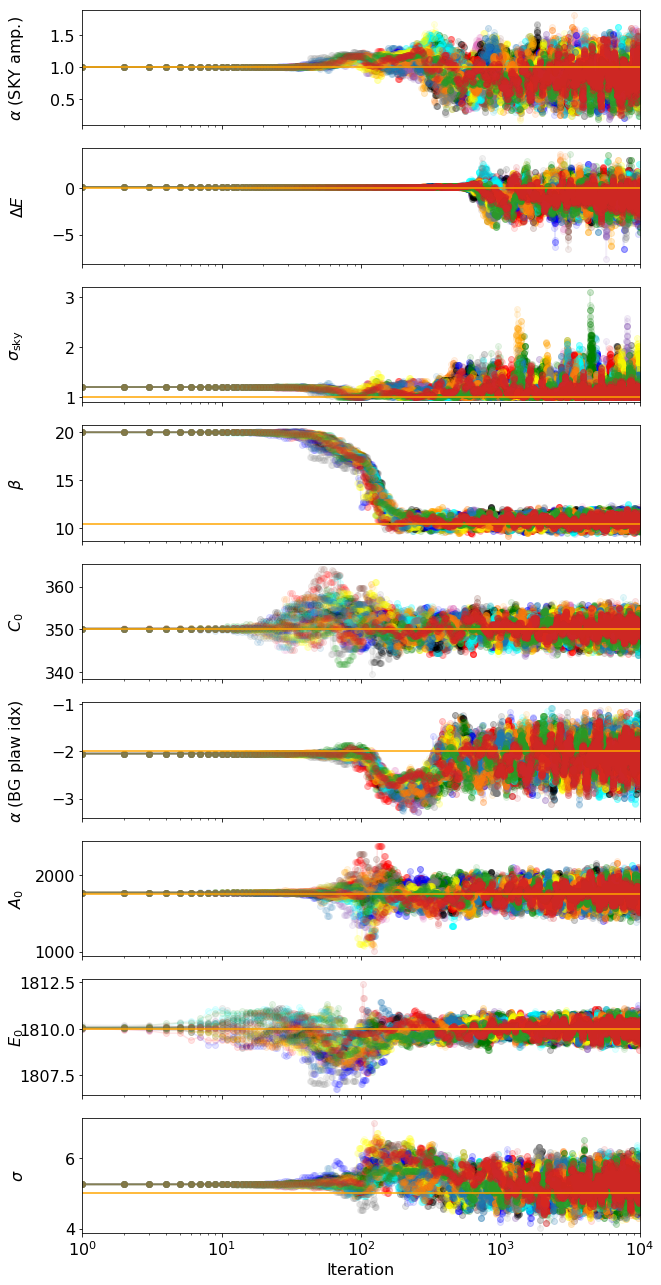

In [226]:
fig, axes = plt.subplots(ndim, figsize=(10, ndim*2.5), sharex=True)

for i in range(ndim):
    ax = axes[i]
    ax.plot(np.arange(n_samples),samples[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, n_samples)
    ax.plot([1,n_samples],[truths[i],truths[i]],color='orange')
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_xscale('log')

axes[-1].set_xlabel("Iteration");

In [229]:
# evaluate models according to sampling

# we calculate only the last 100 samples from each walker,
# because it will just take forever otherwise
n_use = 100
n_plot_samples = nwalkers*n_use

# we thus have 1000 model realisations for each of the 100 energy bins
y_models = np.zeros((len(ee),n_plot_samples))
# and since we can, we calculate that for the sky and background separately
y_models_sky = np.zeros((len(ee),n_plot_samples))
y_models_bg = np.zeros((len(ee),n_plot_samples))

last_x_samples = iters-n_use

for i in range(nwalkers*last_x_samples,nwalkers*last_x_samples+n_plot_samples):
    # need to calculate interpolation in each step here:
    sky_model_dEsE = interpol((ee-E_lab)*samplesf[i,2]+(E_lab+samplesf[i,1]),sky_model,kind='linear',bounds_error=False,fill_value=0)
    sky_model_shifted_broadened = sky_model_dEsE(ee)
    # to then calculate posteriors
    y_models_sky[:,i-nwalkers*last_x_samples] = samplesf[i,0]*sky_model_shifted_broadened
    bg_model_tmp = plaw_gaussian(ee,samplesf[i,4:])
    bg_model_tmp /= np.mean(bg_model_tmp)
    y_models_bg[:,i-nwalkers*last_x_samples] = samplesf[i,3]*bg_model_tmp
    
y_models = y_models_sky + y_models_bg

(0, 31.5)

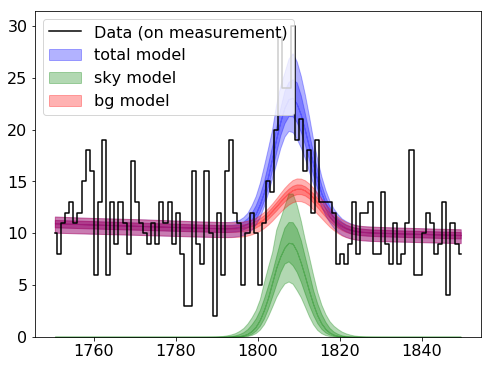

In [230]:
# and plotting the thing:

# data
plt.step(ee,on_spec,where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total model
    plt.fill_between(ee,
                     np.percentile(y_models,50-level/2,axis=1),
                     np.percentile(y_models,50+level/2,axis=1),
                     color='blue',alpha=0.3,label='total model')

    # sky model
    plt.fill_between(ee,
                     np.percentile(y_models_sky,50-level/2,axis=1),
                     np.percentile(y_models_sky,50+level/2,axis=1),
                     color='green',alpha=0.3,label='sky model')

    # bg model
    plt.fill_between(ee,
                     np.percentile(y_models_bg,50-level/2,axis=1),
                     np.percentile(y_models_bg,50+level/2,axis=1),
                     color='red',alpha=0.3,label='bg model')

# and a useful legend
plt.legend(['Data (on measurement)','total model','sky model','bg model'])
plt.ylim(0,)

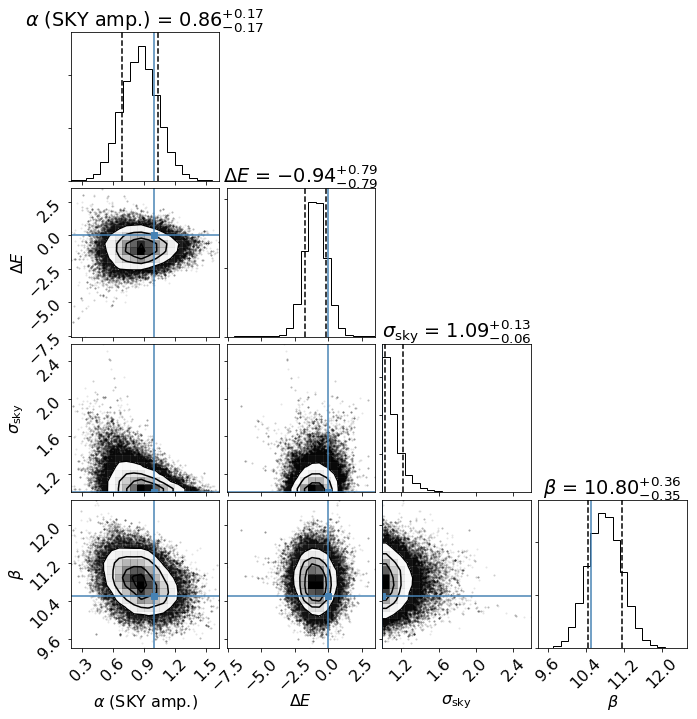

In [231]:
fig = corner.corner(samplesf[burnin*nwalkers:,0:4],
                    labels=labels[0:4],
                    truths=truths[0:4],
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

In [238]:
#
# Diehl+2006: velocity broadening: v = sqrt(kT/m) = FWHM sqrt(3) c / (2sqrt(2ln2)) = 122 km/s FWHM/keV
#
# FWHM = 2*sqrt(2*ln2) * sqrt((sigma_sky*sigma_sky_model)**2 - sigma_sky_model**2) = 
#      = 2.355 * sigma_sky_model * sqrt(sigma_sky**2 -1)
#
# sigma_sky_model == instrumental resolution of COSI (or in this example par_sky[4])
# 
# 3sigma upper limit = 99.7th percentile:

sigma_sky_ul = np.percentile(samplesf[burnin*nwalkers:,2],99.7)


print('velocity broadening: {0:1.1f} km/s'.format(122 * 2.355 * par_sky[4] * np.sqrt(sigma_sky_ul**1-1)))

velocity broadening: 845.2 km/s


In [236]:
par_sky

[0, 0, 100, 1808.74, 3.5]

In [109]:
from scipy.optimize import minimize as op

In [115]:
x = np.linspace(1750,1850,1000)

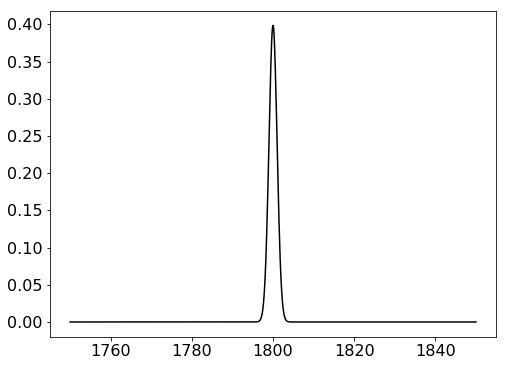

In [116]:
plt.plot(x,Gaussian(x,[1,1800,1]))

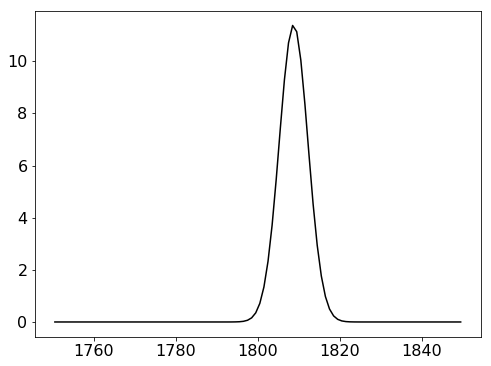

In [118]:
plt.plot(ee,sky_model)

In [119]:
dE = 4.0
sE = 2
sky_model_dE = interpol((ee-E_lab)*sE+(E_lab+dE),sky_model,kind='linear',bounds_error=False,fill_value=0)

In [123]:
def fit_Gaussian(p,x,y):
    A0 = p[0]
    x0 = p[1]
    sigma = p[2]
    
    val = A0/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*((x-x0)/sigma)**2)
    
    return np.sum((val-y)**2)

In [127]:
dE = 4.0
N_tests = 20
sE_arr = np.linspace(1,5,N_tests)

fit_par_arr = np.zeros((3,N_tests))

for i in range(N_tests):
    sky_model_dE = interpol((ee-E_lab)*sE_arr[i]+(E_lab+dE),sky_model,kind='linear',bounds_error=False,fill_value=0)
    res = op(fit_Gaussian,(200,E_lab+dE,2),args=(ee,sky_model_dE(ee)))
    fit_par_arr[:,i] = res.x

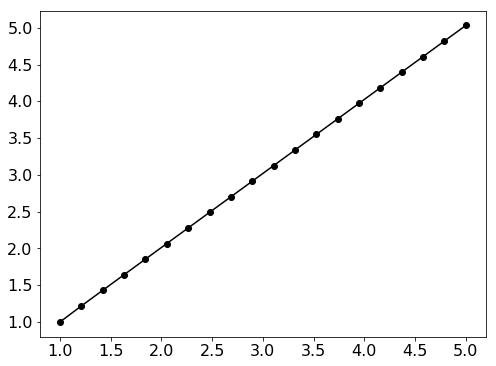

In [132]:
plt.plot(sE_arr,fit_par_arr[2,:]/3.5,'o-')

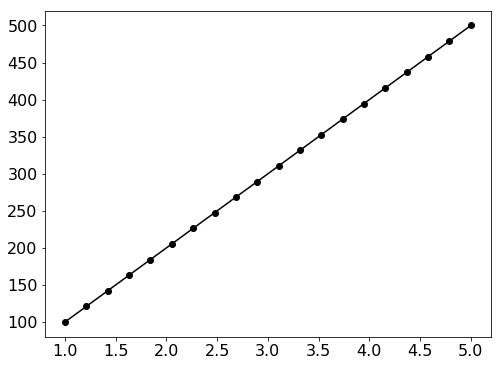

In [133]:
plt.plot(sE_arr,fit_par_arr[0,:],'o-')

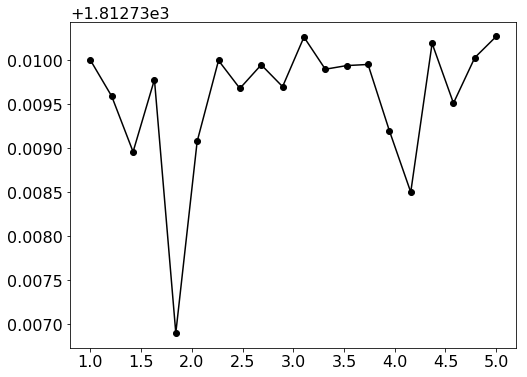

In [134]:
plt.plot(sE_arr,fit_par_arr[1,:],'o-')

In [131]:
op(fit_Gaussian,(200,E_lab+dE,2),args=(ee,sky_model_dE(ee)))

      fun: 0.035066068208017304
 hess_inv: array([[4.85976075e+01, 4.64687904e-02, 1.19849717e+00],
       [4.64687904e-02, 7.87150463e-02, 2.66974887e-03],
       [1.19849717e+00, 2.66974887e-03, 8.33851910e-02]])
      jac: array([ 6.56582415e-08,  1.64378434e-07, -1.03283674e-06])
  message: 'Optimization terminated successfully.'
     nfev: 115
      nit: 21
     njev: 23
   status: 0
  success: True
        x: array([ 500.0117838 , 1812.74026813,   17.61581802])

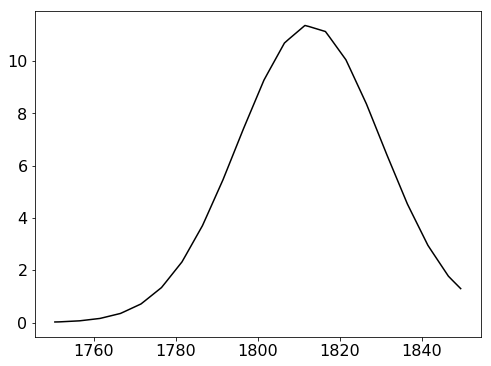

In [130]:
plt.plot(ee,sky_model_dE(ee))

In [102]:
ee[np.argmax(sky_model_dE(ee))]-dE

1808.5